In [1068]:
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
import numpy as np
import pandas as pd
import os
import glob
import gffpandas.gffpandas as gffpd
import sys
from functools import reduce

pd.set_option('display.max_columns', None)
%matplotlib inline
%config Completer.use_jedi = False

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 

In [592]:
%cd ~/storage/metagenome/bact_4x/new_con/diamond/con
!ls

/mnt/storage/metagenome/bact_4x/new_con/diamond/con
14.faa		    29.faa.ann		      emappertmp_dmdn_2fzhmyhd
14.faa.0123	    29.faa.bwt.2bit.64	      emappertmp_dmdn_679yd7di
14.faa.amb	    29.faa.pac		      emappertmp_dmdn_884t_3j9
14.faa.ann	    46.faa		      emappertmp_dmdn_8ajot3py
14.faa.bwt.2bit.64  46.faa.0123		      emappertmp_dmdn_a8xenu7y
14.faa.pac	    46.faa.amb		      emappertmp_dmdn_ddn1iuxw
26.faa		    46.faa.ann		      emappertmp_dmdn_es36gzfa
26.faa.0123	    46.faa.bwt.2bit.64	      emappertmp_dmdn_hl71_i58
26.faa.amb	    46.faa.pac		      emappertmp_dmdn_j93iidr0
26.faa.ann	    dram		      emappertmp_dmdn_jx_ogk4f
26.faa.bwt.2bit.64  eggnog		      emappertmp_dmdn_k3m5wh2n
26.faa.pac	    eggnog2		      emappertmp_dmdn_r5_wvzv9
29.faa		    eggnog3		      kraken2_rep
29.faa.0123	    emappertmp_dmdn_0ktzj6e8  kraken2_res
29.faa.amb	    emappertmp_dmdn_1c37zntg  staramr


In [4]:
files_in_dir=['./14_prokka/PROKKA_06282021.gff', './26_prokka/PROKKA_06282021.gff', './29_prokka/PROKKA_06282021.gff', './46_prokka/PROKKA_06282021.gff']
files_l = []
for f in files_in_dir:   
    !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
    df = pd.read_csv('contig_ids_temp.tsv', sep='\t',  names=['contig', 'Gene_ID'])
    community = f'{f}'.split("/")[1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
    !rm contig_ids_temp.tsv
df_ids = pd.concat(files_l)
df_ids["contig"] = df_ids["contig"].str[1:]
df_ids

,community,contig,Gene_ID
0,14,427,MEBDDFFA_00001
1,14,427,MEBDDFFA_00002
2,14,427,MEBDDFFA_00003
3,14,427,MEBDDFFA_00004
4,14,427,MEBDDFFA_00005
...,...,...,...
121953,46,68,AAKEFBLG_121954
121954,46,68,AAKEFBLG_121955
121955,46,68,AAKEFBLG_121956
121956,46,1467,AAKEFBLG_121957


### Kraken result formatting

In [4]:
d = {"14.0":"14.0.faa",
     "14.1":"14.1.faa",
     "26.0":"26.0.faa",
     "26.1":"26.1.faa",
     "29.0":"29.0.faa",
     "29.1":"29.1.faa",
     "46.0":"46.0.faa",
     "46.1":"46.1.faa"}

In [5]:
%%bash

for file in con/kraken2_res/*tsv; do
    comm=$(basename $file | cut -c1-2)
    cat $file | cut -f2,3,6 > con/kraken2_res/$comm\_nice.tsv
#     sed -i 'g/\;[a-zA-Z\s]+group\;//i' con/kraken2_res/$comm\_nice.tsv
done;
# grep "Pseudomonas oleovorans" con/kraken2_res/*_res_kraken.tsv
# grep "Pseudomonas oleovorans" con/kraken2_res/*_nice.tsv

In [6]:
for f in glob.glob('con/kraken2_res/*_nice.tsv'):
    l_1 = []
    counter = 0
    counter2 = 0
    with open(f, 'r') as file:      
        for l in file:

            if counter > 0:
                l_1[-1] = l_1[-1] + '\n'
            counter = 0
            for i in l.split(";"):
                if (not i.endswith("group")) and (counter < 8):              
                    l_1.append(i.rstrip())
                    if counter2 == 0:
                        l_1[0] = '\t' + l_1[0]
                    counter += 1
                    counter2 += 1
    with open(f, 'w') as file:
        file.write('\t'.join(l_1) + '\n')

!head con/kraken2_res/14_nice.tsv
%rm con/kraken2_res/_n_nice.tsv

	427	926565	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1457	926565	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1813	452637	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	768	68287	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Phyllobacteriaceae	Mesorhizobium
	1440	374	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Bradyrhizobiaceae	Bradyrhizobium
	897	452637	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	1041	2	cellular organisms	Bacteria
	1454	2161865	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	unclassified Opitutaceae	Opitutaceae bacterium EW11
	608	2171623	cellular organisms	Bacteria	Actinobacteria	Actinomycetia	Micro

In [1]:
df_taxa

NameError: name 'df_taxa' is not defined

In [7]:
files_l = []
for f in glob.glob('./con/kraken2_res/*nice.tsv'):
    df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "id", "d","Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
    community = f'{f}'.split("/")[-1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
df = pd.concat(files_l)
df_taxa = df.drop(['zero', 'd'], axis=1)
df_taxa
# taxa = df['taxa'].str.split(';',expand=True).loc[:, 1:7]
# taxa.columns = ["Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"]
# taxa.query("Kingdom != 'Bacteria'")
# df.query("Kingdom != 'Bacteria'")


,community,contig,id,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,29,540,1883,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,29,471,2015316,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,29,109,266749,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,29,954,29313,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,29,297,1827501,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
...,...,...,...,...,...,...,...,...,...,...
1584,26,1387,935863,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,unclassified Luteimonas
1585,26,964,1736575,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
1586,26,1016,2116701,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,Mesorhizobium ephedrae
1587,26,35,356,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,NaN,NaN,NaN


In [8]:
df_taxa.query("Kingdom != 'Bacteria'")

,community,contig,id,Kingdom,Phylum,Class,Order,Family,Genus,Species
8,29,74,9606,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata
81,29,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,29,1080,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,29,1081,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,29,1149,131567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,29,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1381,29,1553,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,29,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,29,323,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,29,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_taxa_ids = df_taxa.iloc[:, 2:10]
df_taxa_ids = df_taxa_ids.drop_duplicates()
df_taxa_ids

16S taxonomy -- Kraken \

#### 14 comm

16S tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 9.2 | 1 | 1 | 8.2 |
| Pseudoxanthomonas | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |

kraken tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Bosea | 1.3| 0 | 2 | 6.4|
| Opitutus terrae | 4.7 | 3 | 0 | 3 
alpha -- 456

#### 29 comm

16S tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 24.4 | 1 | 0 | 0.9 |
| Pilrellula | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |

kraken tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 9.2 | 1 | 1 | 8.2 |
| Pseudoxanthomonas | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |


In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 100)

taxa_allcounted = df_taxa.groupby(['community', 'id']).count().sort_values('contig', ascending=False).reset_index().iloc[:, :3].rename(columns={"contig": "count"})
taxa_allcounted = taxa_allcounted.merge(df_taxa_ids, on='id', how='left')
# taxa_allcounted.query('community == 14')
taxa_allcounted

,community,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,14,926565,156,Bacteria,Bacteroidetes,Cytophagia,Cytophagales,Cytophagaceae,Sporocytophaga,Sporocytophaga myxococcoides
1,26,935863,143,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,unclassified Luteimonas
2,46,1736675,142,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
3,46,32002,135,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter denitrificans
4,14,406341,122,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
5,26,1736575,119,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
6,46,1036780,103,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,Bosea robiniae
7,29,1827501,102,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
8,26,406341,101,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
9,14,452637,90,Bacteria,Verrucomicrobia,Opitutae,Opitutales,Opitutaceae,Opitutus,Opitutus terrae


In [11]:
one_comm = taxa_allcounted[taxa_allcounted['community'] == '46']
sum_count = sum(one_comm['count'])
one_comm = one_comm.assign(count = one_comm['count'] / sum_count * 100)
one_comm
# len(one_comm)

,community,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species
2,46,1736675,8.442331,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
3,46,32002,8.026159,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter denitrificans
6,46,1036780,6.123662,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,Bosea robiniae
26,46,128785,3.567182,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Pseudoxanthomonas,Pseudoxanthomonas mexicana
27,46,664962,3.507729,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
30,46,93064,3.032105,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,Sphingomonas koreensis
31,46,1742774,2.972652,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
41,46,1121303,2.318668,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
42,46,2048901,2.140309,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Caulobacter,unclassified Caulobacter
48,46,648716,1.783591,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Cohnella,unclassified Cohnella


### CAZy parcer

In [13]:
files_l = []
names = []
for f in glob.glob('./*faa_dbcan/overview.txt'):
    df = pd.read_csv(f'{f}', sep='\t')
    filename = f'{f}'.split("/")[1][:4]
    df.insert(0, 'filename', filename)
    files_l.append(df)
df = pd.concat(files_l)
df.reset_index(inplace=True)
community = df['filename'].str.split('.',expand=True)[0]
df.insert(0, 'community', community)
df_cazy = df.drop(columns=['filename', 'index'])
df_cazy.columns = ['community', 'Gene_ID', 'HMMER', 'Hotpep', 'DIAMOND', 'NumberofTools']
df_cazy


# files_l = []
# for f in glob.glob('./con/kraken2_res/*nice.tsv'):
#     df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "d" ,"Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
#     community = f'{f}'.split("/")[-1][:2]
#     df.insert(0, 'community', community)
#     files_l.append(df)
# df = pd.concat(files_l)
# df = df.drop(['zero', 'd'], axis=1)
# df

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
5,46,AAKEFBLG_00283,GH2(2-467),GH2(24),GH2,3
6,46,AAKEFBLG_00348,CE9(16-227),CE9(2),-,2
7,46,AAKEFBLG_00357,CBM32(443-559),-,CBM35+GH9,2
8,46,AAKEFBLG_00358,GH9(86-430),GH9(25),CBM35+GH9,3
9,46,AAKEFBLG_00366,GH38(1-183),GH38(5),GH38,3


In [18]:
df_cazy

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
5,46,AAKEFBLG_00283,GH2(2-467),GH2(24),GH2,3
6,46,AAKEFBLG_00348,CE9(16-227),CE9(2),-,2
7,46,AAKEFBLG_00357,CBM32(443-559),-,CBM35+GH9,2
8,46,AAKEFBLG_00358,GH9(86-430),GH9(25),CBM35+GH9,3
9,46,AAKEFBLG_00366,GH38(1-183),GH38(5),GH38,3


In [14]:
df_cazy_f = df_cazy[df_cazy['NumberofTools'] > 1]
df_cazy_f = df_cazy_f.replace('-', value=np.nan)
# df.replace(regex={r'^ba.$': 'new'})
df_cazy_f = df_cazy_f.replace('\(.*\)', '', regex=True)
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2


In [20]:
# df_cazy_f['is_equal'] = (df_cazy_f['HMMER'] == df_cazy_f['Hotpep'])
df_cazy_f.HMMER.mode()

0    GT2_Glycos_transf_2
dtype: object

In [21]:
df_cazy_f['HMMER'].value_counts()[:10].index.tolist()

['GT2_Glycos_transf_2',
 'GT4',
 'GH3',
 'GT51',
 'GH23',
 'GH2',
 'GH103',
 'GH51',
 'GH1',
 'GH10']

#### mode

In [15]:
df_cazy_f["mode"] = df_cazy_f[['HMMER', 'Hotpep', 'DIAMOND']].T.mode().values.tolist()[0]
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3


In [16]:
df_max = df_cazy_simple.groupby(['mode']).count().sort_values('community', ascending=False)
df_max

NameError: name 'df_cazy_simple' is not defined

In [25]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/gladkov2/anaconda3/envs/vamb/lib/python3.8/site-packages/pandas/_config/config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/home/gladkov2/anaconda3/envs/vamb/lib/python3.8/site-packages/pandas/_config/config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


#### create fake otu table

In [17]:
# df_cazy_f[['community','mode']].agg("mode").count()
fake_otu = df_cazy_f.groupby(['community','mode']).size().reset_index(name='counts')
fake_otu = fake_otu.pivot(index='mode', columns='community', values='counts').fillna('0')
fake_otu.to_csv('fake_otu',index=True, sep = '\t')
fake_otu
# !pwd


community,14,26,29,46
mode,,,,
AA10,3.0,3.0,2.0,1.0
AA3,13.0,12.0,6.0,16.0
AA3_2,7.0,12.0,4.0,6.0
AA4,0,0,0,1.0
AA6,1.0,1.0,3.0,3.0
AA7,1.0,4.0,0,4.0
CBM0+CBM6+GH39,0,0,1.0,0
CBM10+CBM2+GH16,0,1.0,0,0
CBM10+CBM2+GH45,1.0,1.0,0,0


In [18]:
fake_index = fake_otu.index.to_list()
fake_index
GH = ["GH" in item for item in fake_index]
GT = ["GT" in item for item in fake_index]


In [52]:
GH

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,


In [19]:
td = pd.read_csv("fake_otu", sep='\t')
td = td.drop_duplicates()
td.assign(f = td[['14', '26', '29', '46']].sum(axis=1)).sort_values('f', ascending=False).drop('f', axis=1)

,mode,14,26,29,46
343,GT2,134.0,167.0,136.0,195.0
358,GT4,104.0,133.0,103.0,170.0
240,GH3,48.0,79.0,77.0,91.0
362,GT51,59.0,88.0,60.0,80.0
231,GH2,40.0,44.0,51.0,73.0
233,GH23,46.0,63.0,40.0,58.0
160,GH0,23.0,19.0,22.0,45.0
334,GT0,23.0,31.0,21.0,34.0
153,CE4,20.0,21.0,20.0,46.0
164,GH103,18.0,28.0,23.0,27.0


In [20]:
sortedl = l[['count','mode']].groupby("mode").count().sort_values('count', ascending=False)
sortedl.index.tolist()

TypeError: string indices must be integers

In [21]:
liss = sortedl.index.tolist()
liss

NameError: name 'sortedl' is not defined

In [36]:
l = pd.melt(td, id_vars='mode', value_vars=['14', '26', '29', '46'], var_name='community', value_name='count')
# l = l.sort_values(by=['count'], ascending=False)[0:40]
todraw = l[l['mode'].isin(liss)]
todraw

,mode,community,count
0,AA10,14,3.0
1,AA3,14,13.0
2,AA3_2,14,7.0
3,AA4,14,0.0
4,AA6,14,1.0
...,...,...,...
1635,PL6,46,1.0
1636,PL8,46,16.0
1637,PL9,46,4.0
1638,PL9_1,46,2.0


In [35]:
fake_otu.describe()

community,14,26,29,46
count,410,410,410,410
unique,30,33,29,39
top,0,0,0,0
freq,169,160,172,113


In [53]:
merge1

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig
0,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435
1,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186
2,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186
3,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186
4,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2,46,186
5,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9,46,1532
6,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32,46,1532
7,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9,46,1532
8,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38,46,1532
9,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3,46,759


### Merge all together in one table

In [55]:
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3


In [58]:
df_cazy_f2 = df_cazy_f.copy()
df_cazy_f2["ID_genes"] = df_cazy_f2["community"].astype(str) + "_" + df_cazy_f2["Gene_ID"].astype(str)
df_cazy_f2

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,ID_genes
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46_AAKEFBLG_00146
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46_AAKEFBLG_00264
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46_AAKEFBLG_00268
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46_AAKEFBLG_00282
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2,46_AAKEFBLG_00283
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9,46_AAKEFBLG_00348
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32,46_AAKEFBLG_00357
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9,46_AAKEFBLG_00358
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38,46_AAKEFBLG_00366
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3,46_AAKEFBLG_00415


In [45]:
df_ids

,community,contig,Gene_ID
0,14,427,MEBDDFFA_00001
1,14,427,MEBDDFFA_00002
2,14,427,MEBDDFFA_00003
3,14,427,MEBDDFFA_00004
4,14,427,MEBDDFFA_00005
5,14,427,MEBDDFFA_00006
6,14,427,MEBDDFFA_00007
7,14,427,MEBDDFFA_00008
8,14,427,MEBDDFFA_00009
9,14,427,MEBDDFFA_00010


In [61]:
df_ids_test = df_ids.copy()
df_ids_test["com_con"] = df_ids_test["community"].astype(str) + "_" + df_ids_test["contig"].astype(str)
df_ids_test["com_genes"] = df_ids["community"].astype(str) + "_" + df_ids["Gene_ID"].astype(str)
df_ids_test

,community,contig,Gene_ID,com_con,com_genes
0,14,427,MEBDDFFA_00001,14_427,14_MEBDDFFA_00001
1,14,427,MEBDDFFA_00002,14_427,14_MEBDDFFA_00002
2,14,427,MEBDDFFA_00003,14_427,14_MEBDDFFA_00003
3,14,427,MEBDDFFA_00004,14_427,14_MEBDDFFA_00004
4,14,427,MEBDDFFA_00005,14_427,14_MEBDDFFA_00005
5,14,427,MEBDDFFA_00006,14_427,14_MEBDDFFA_00006
6,14,427,MEBDDFFA_00007,14_427,14_MEBDDFFA_00007
7,14,427,MEBDDFFA_00008,14_427,14_MEBDDFFA_00008
8,14,427,MEBDDFFA_00009,14_427,14_MEBDDFFA_00009
9,14,427,MEBDDFFA_00010,14_427,14_MEBDDFFA_00010


In [51]:
df_cazy_f2

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3


In [48]:

df_ca

In [39]:
df_taxa["ID"] = df_taxa["community"].astype(str) + "_" + df_taxa["contig"].astype(str)
df_taxa


,community,contig,id,Kingdom,Phylum,Class,Order,Family,Genus,Species,ID
0,29,540,1883,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN,29_540
1,29,471,2015316,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea,29_471
2,29,109,266749,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii,29_109
3,29,954,29313,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei,29_954
4,29,297,1827501,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium,29_297
5,29,1268,595537,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax,Variovorax paradoxus,29_1268
6,29,524,1701910,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Agrobacterium,unclassified Agrobacterium,29_524
7,29,210,1701910,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Agrobacterium,unclassified Agrobacterium,29_210
8,29,74,9606,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata,29_74
9,29,606,2135485,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,unclassified Sphingomonas,29_606


In [25]:
merge1 = df_cazy_f.merge(df_ids, on='Gene_ID', how='left')
# merge3 = merge1.merge(df_taxa_ids, on='ID', how='left')
merge1

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig
0,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435
1,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186
2,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186
3,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186
4,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2,46,186
5,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9,46,1532
6,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32,46,1532
7,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9,46,1532
8,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38,46,1532
9,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3,46,759


In [44]:
df_cazy_f_test["ID"]


,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
6,46,AAKEFBLG_00348,CE9,CE9,NaN,2,CE9
7,46,AAKEFBLG_00357,CBM32,NaN,CBM35+GH9,2,CBM32
8,46,AAKEFBLG_00358,GH9,GH9,CBM35+GH9,3,GH9
9,46,AAKEFBLG_00366,GH38,GH38,GH38,3,GH38
10,46,AAKEFBLG_00415,AA3_2,AA3,NaN,2,AA3


In [38]:
df_taxa

,community,contig,id,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,29,540,1883,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,29,471,2015316,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,29,109,266749,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,29,954,29313,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,29,297,1827501,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
5,29,1268,595537,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax,Variovorax paradoxus
6,29,524,1701910,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Agrobacterium,unclassified Agrobacterium
7,29,210,1701910,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Agrobacterium,unclassified Agrobacterium
8,29,74,9606,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata
9,29,606,2135485,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,unclassified Sphingomonas


### GT\GH
| *14 comm* | *26 comm* | *29 comm* | *46 comm* |
| --- | --- | --- | --- |
| 832/465 | 953/593 | 835/467 | 1366/672 |
|	~1.79 | ~1.61| ~1.79 | ~2.03 |



In [31]:
todraw_sorted = todraw.sort_values(by="count", ascending=False)
fake_index = todraw_sorted["mode"].to_list()
todraw_sorted["GH"] = ["GH" in item for item in fake_index]
todraw_sorted["GT"] = ["GT" in item for item in fake_index]
todraw_sorted.query("GH == True and GT == False and community == '14'").count()[0]
todraw_sorted.groupby(by=["community","GH", "GT"]).sum()

NameError: name 'todraw' is not defined

In [93]:
plt.figure(figsize=(15, 10))
sns.barplot(data=todraw_sorted, x="mode", y = "count", hue="community")

TypeError: 'module' object is not callable

In [84]:
todraw_sorted['community'].unique()

array(['46', '26', '29', '14'], dtype=object)

In [22]:
merge1

NameError: name 'merge1' is not defined

In [131]:
df_taxa[] df_taxa["community"].astype(str) + "_" + df_taxa["contig"].astype(str)

SyntaxError: invalid syntax (<ipython-input-131-ccc4a515cdce>, line 1)

### Read CAZy

In [41]:
pd.read_csv("../../cazy/cazy-parser-1.4.2/CAZy_DB_Glycoside-Hydrolases_09-09-2021.csv")

ParserError: Error tokenizing data. C error: Expected 11 fields in line 6, saw 12


In [64]:
anno = pd.read_csv("../diamond/con/dram/genome_summaries_3/product.tsv", delimiter="\t")

In [120]:
anno_h = anno.transpose()
anno_h = anno_h.rename(columns=anno_h.iloc[0])
anno_h = anno_h.drop(anno_h.index[0])
anno_h = anno_h.astype(np.float64)
anno_h


,14,26,29,46
3-Hydroxypropionate bi-cycle,1.000000,0.750000,0.500000,1.000000
"Acetyl-CoA pathway, CO2 => acetyl-CoA",0.000000,0.000000,0.000000,0.000000
"Citrate cycle (TCA cycle, Krebs cycle)",1.000000,1.000000,1.000000,1.000000
Dicarboxylate-hydroxybutyrate cycle,0.615385,0.615385,0.538462,0.615385
"Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate",1.000000,1.000000,1.000000,1.000000
"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate",0.888889,0.888889,1.000000,1.000000
Glyoxylate cycle,1.000000,1.000000,1.000000,1.000000
Hydroxypropionate-hydroxybutylate cycle,0.285714,0.285714,0.214286,0.142857
"Methanogenesis, CO2 => methane",0.125000,0.250000,0.375000,0.500000
Pentose phosphate pathway (Pentose phosphate cycle),1.000000,1.000000,1.000000,1.000000


In [84]:
anno_l = anno.melt("genome")
anno_l["value"] = anno_l["value"].astype(float)
anno_l

,genome,variable,value
0,14,3-Hydroxypropionate bi-cycle,1.000000
1,26,3-Hydroxypropionate bi-cycle,0.750000
2,29,3-Hydroxypropionate bi-cycle,0.500000
3,46,3-Hydroxypropionate bi-cycle,1.000000
4,14,"Acetyl-CoA pathway, CO2 => acetyl-CoA",0.000000
5,26,"Acetyl-CoA pathway, CO2 => acetyl-CoA",0.000000
6,29,"Acetyl-CoA pathway, CO2 => acetyl-CoA",0.000000
7,46,"Acetyl-CoA pathway, CO2 => acetyl-CoA",0.000000
8,14,"Citrate cycle (TCA cycle, Krebs cycle)",1.000000
9,26,"Citrate cycle (TCA cycle, Krebs cycle)",1.000000


In [171]:
plt.rcParams['ytick.labelsize']

3.3

<AxesSubplot:>

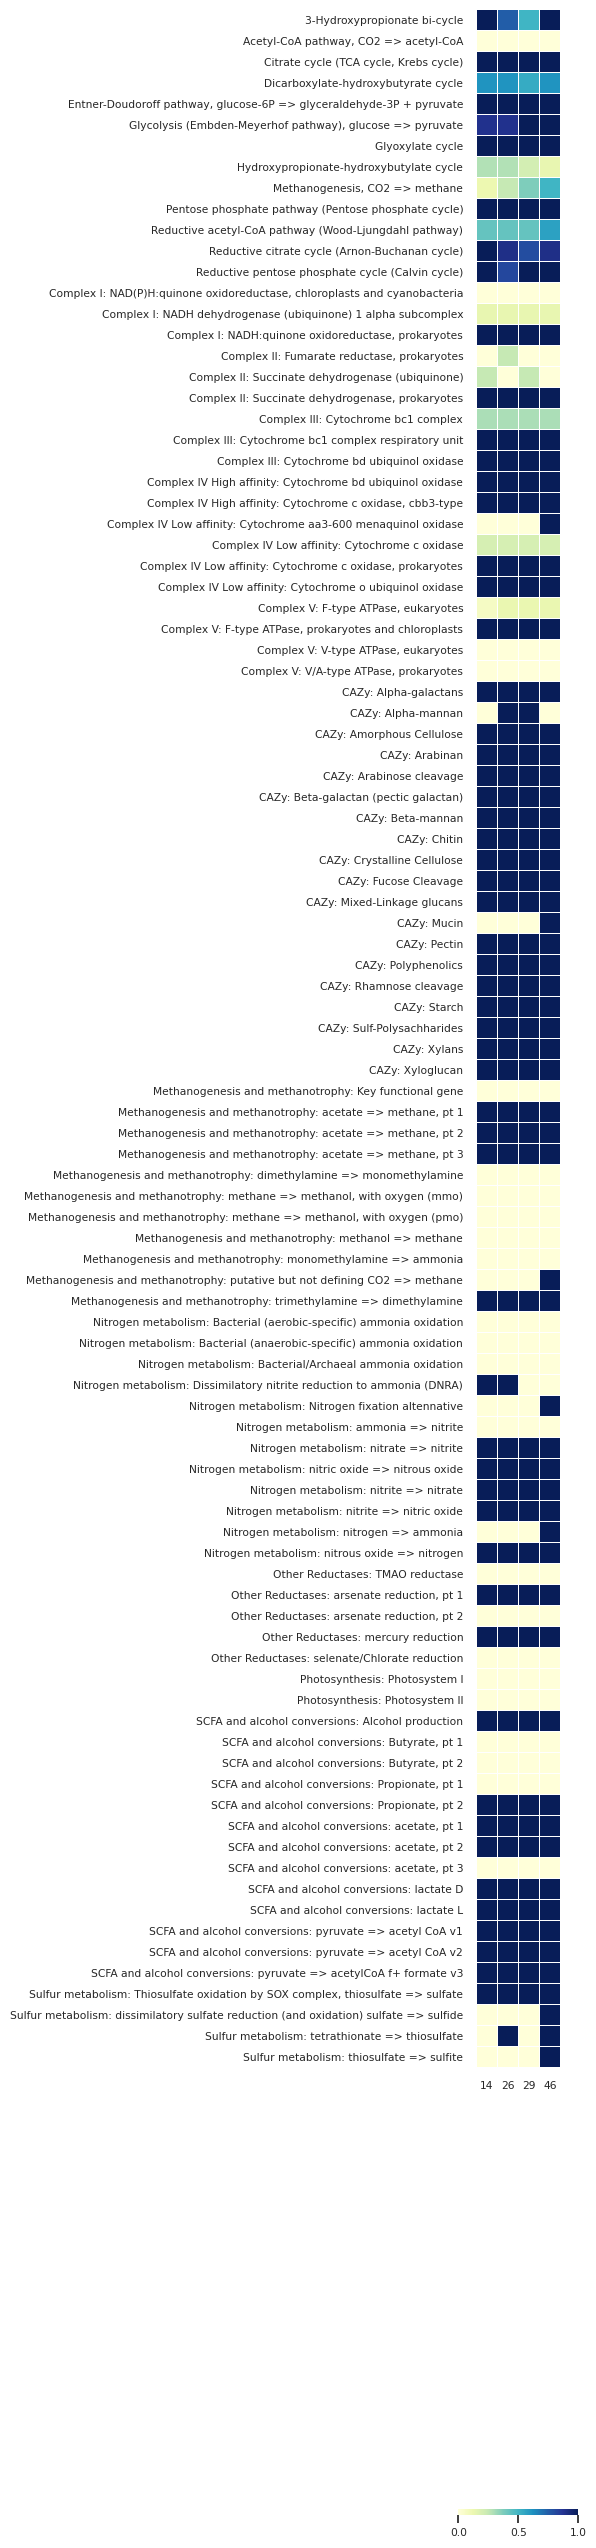

In [241]:
# fig = plt.figure(num=None, figsize=(0.7, 8), dpi=300, facecolor='w', edgecolor='k')
# sns.set(font_scale=0.3)
fig, ax = plt.subplots(
        figsize=(1,14), 
        gridspec_kw=dict(top=2.1, bottom=0.000002, right= 1.7, left = 0.5),
        dpi=100)
sns.set(font_scale=0.7)
sns.heatmap(data=anno_h, ax=ax, square = True, cbar_kws={"orientation": "horizontal"}, cmap="YlGnBu", linewidths=0.1)

In [176]:
ax

<AxesSubplot:>

<AxesSubplot:xlabel='x', ylabel='Count'>

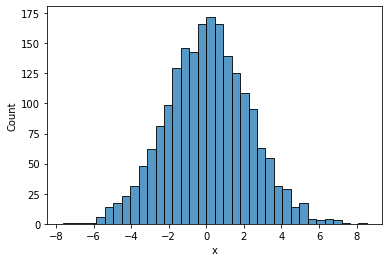

In [100]:

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
%matplotlib inline

sns.histplot(data['x'])

In [1]:
df_taxa

NameError: name 'df_taxa' is not defined

### run new annotation

eggnog envinroment

before eggnog run base was been biuild with 

create_dbs.py --data_dir ~/storage/somebases/eggnog/ --dbname mmseqs  -m mmseqs --taxids 1 -y


In [10]:
%cd ~/storage/metagenome/bact_4x/new_con/diamond/con

/mnt/storage/metagenome/bact_4x/new_con/diamond/con


In [11]:
%ll -hts

total 2.4G
4.0K drwxrwxr-x 3 gladkov2 4.0K Nov 12 13:32 staramr/
4.0K drwxrwxr-x 3 gladkov2 4.0K Nov  4 16:15 kraken2_res/
348M -rw-rw-r-- 1 gladkov2 348M Oct  8 05:22 46.faa.bwt.2bit.64
214M -rw-rw-r-- 1 gladkov2 214M Oct  8 05:21 46.faa.0123
4.0K -rw-rw-r-- 1 gladkov2   17 Oct  8 05:21 46.faa.amb
 52K -rw-rw-r-- 1 gladkov2  52K Oct  8 05:21 46.faa.ann
 27M -rw-rw-r-- 1 gladkov2  27M Oct  8 05:21 46.faa.pac
283M -rw-rw-r-- 1 gladkov2 283M Oct  8 05:20 29.faa.bwt.2bit.64
174M -rw-rw-r-- 1 gladkov2 174M Oct  8 05:19 29.faa.0123
4.0K -rw-rw-r-- 1 gladkov2   29 Oct  8 05:19 29.faa.amb
 48K -rw-rw-r-- 1 gladkov2  47K Oct  8 05:19 29.faa.ann
 22M -rw-rw-r-- 1 gladkov2  22M Oct  8 05:19 29.faa.pac
303M -rw-rw-r-- 1 gladkov2 303M Oct  8 05:19 26.faa.bwt.2bit.64
187M -rw-rw-r-- 1 gladkov2 187M Oct  8 05:18 26.faa.0123
4.0K -rw-rw-r-- 1 gladkov2   16 Oct  8 05:18 26.faa.amb
 52K -rw-rw-r-- 1 gladkov2  49K Oct  8 05:18 26.faa.ann
 24M -rw-rw-r-- 1 gladkov2  24M Oct  8 05:18 26.faa.pac
285M -rw-r

In [13]:
!mkdir eggnog

In [44]:
%%bash
for file in *.faa; do
    emapper.py -i $file -o test --cpu 100 --translate --itype metagenome \
    --data_dir /home/gladkov2/storage/somebases/eggnog/ -m mmseqs --output_dir eggnog \
    --output $file 
done;


#  emapper-2.1.3
# emapper.py  -i 14.faa -o test --cpu 100 --translate --itype metagenome --data_dir /home/gladkov2/storage/somebases/eggnog/ -m mmseqs --output_dir eggnog --output 14.faa
  /home/gladkov2/anaconda3/envs/eggnog/bin/mmseqs createdb /mnt/storage/metagenome/bact_4x/new_con/diamond/con/14.faa /mnt/storage/metagenome/bact_4x/new_con/diamond/con/emappertmp_mmseqs_2xg57iye/049e231a145447d9a54a0d4527d9fe3f --dbtype 2
  /home/gladkov2/anaconda3/envs/eggnog/bin/mmseqs search -a true /mnt/storage/metagenome/bact_4x/new_con/diamond/con/emappertmp_mmseqs_2xg57iye/049e231a145447d9a54a0d4527d9fe3f /mnt/storage/somebases/eggnog/mmseqs/mmseqs.db /mnt/storage/metagenome/bact_4x/new_con/diamond/con/emappertmp_mmseqs_2xg57iye/52290421231b4f24b219cd36f909acf7 /mnt/storage/metagenome/bact_4x/new_con/diamond/con/emappertmp_mmseqs_2xg57iye --start-sens 3 --sens-steps 3 -s 7 --threads 100
  /home/gladkov2/anaconda3/envs/eggnog/bin/mmseqs convertalis /mnt/storage/metagenome/bact_4x/new_con/diamo

Funcional annotation of hits...
0 1.621246337890625e-05 0.00 q/s (% mem usage: 1.10, % mem avail: 98.91)
Decorating gff file /mnt/storage/metagenome/bact_4x/new_con/diamond/con/eggnog/14.faa.emapper.gff...
Parsing fasta file /mnt/storage/metagenome/bact_4x/new_con/diamond/con/14.faa...
Fasta file /mnt/storage/metagenome/bact_4x/new_con/diamond/con/14.faa parsing complete.
500 2047.8935377597809 0.24 q/s (% mem usage: 1.20, % mem avail: 98.78)
1000 2047.9045927524567 0.49 q/s (% mem usage: 1.20, % mem avail: 98.78)
1500 2047.9157960414886 0.73 q/s (% mem usage: 1.20, % mem avail: 98.78)
2000 2047.9265518188477 0.98 q/s (% mem usage: 1.20, % mem avail: 98.78)
2500 2047.9361550807953 1.22 q/s (% mem usage: 1.20, % mem avail: 98.78)
3000 2047.9465715885162 1.46 q/s (% mem usage: 1.20, % mem avail: 98.78)
3500 2047.9568622112274 1.71 q/s (% mem usage: 1.20, % mem avail: 98.78)
4000 2047.9680914878845 1.95 q/s (% mem usage: 1.20, % mem avail: 98.78)
4500 2047.9789628982544 2.20 q/s (% mem us

In [28]:
%ll -h /home/gladkov2/storage/somebases/eggnog/mmseqs.mmseqs/

total 86G
-rw-rw-r-- 1 gladkov2 8.4G Dec 14 15:28 mmseqs.mmseqs
-rw-rw-r-- 1 gladkov2    4 Dec 14 15:28 mmseqs.mmseqs.dbtype
-rw-rw-r-- 1 gladkov2  76G Dec 14 15:34 mmseqs.mmseqs.idx
-rw-rw-r-- 1 gladkov2    4 Dec 14 15:34 mmseqs.mmseqs.idx.dbtype
-rw-rw-r-- 1 gladkov2  442 Dec 14 15:34 mmseqs.mmseqs.idx.index
-rw-rw-r-- 1 gladkov2 548M Dec 14 15:28 mmseqs.mmseqs.index
-rw-rw-r-- 1 gladkov2 759M Dec 14 15:29 mmseqs.mmseqs.lookup
-rw-rw-r-- 1 gladkov2   13 Dec 14 15:28 mmseqs.mmseqs.source
-rw-rw-r-- 1 gladkov2 535M Dec 14 15:28 mmseqs.mmseqs_h
-rw-rw-r-- 1 gladkov2    4 Dec 14 15:28 mmseqs.mmseqs_h.dbtype
-rw-rw-r-- 1 gladkov2 501M Dec 14 15:29 mmseqs.mmseqs_h.index


In [42]:
!download_eggnog_data.py  -D -M -P -y --data_dir ~/storage/somebases/eggnog/

cd /mnt/storage/somebases/eggnog && wget -nH --user-agent=Mozilla/5.0 --relative --no-parent --reject "index.html*" --cut-dirs=4 -e robots=off -O eggnog.db.gz http://eggnogdb.embl.de/download/emapperdb-5.0.2/eggnog.db.gz && echo Decompressing... && gunzip eggnog.db.gz 
--2021-12-15 23:37:59--  http://eggnogdb.embl.de/download/emapperdb-5.0.2/eggnog.db.gz
Resolving eggnogdb.embl.de... 194.94.44.170
Connecting to eggnogdb.embl.de|194.94.44.170|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://eggnog5.embl.de/download/emapperdb-5.0.2/eggnog.db.gz [following]
--2021-12-15 23:37:59--  http://eggnog5.embl.de/download/emapperdb-5.0.2/eggnog.db.gz
Resolving eggnog5.embl.de... 194.94.44.170
Reusing existing connection to eggnogdb.embl.de:80.
HTTP request sent, awaiting response... 200 OK
Length: 6776977123 (6.3G) [application/octet-stream]
Saving to: ‘eggnog.db.gz’

eggnog.db.gz        100%[===================>]   6.31G  4.49MB/s    in 21m 35s 

20

In [46]:
%cd eggnog/

/mnt/storage/metagenome/bact_4x/new_con/diamond/con/eggnog


tail -n +5 14.faa.emapper.annotations | head -n -3 > 14.anno.tsv

In [3]:
df = pd.read_csv("/home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog/14.anno.tsv", delimiter="\t")
df

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,c1469_0,391735.Veis_3640,3.785000e-197,620.0,"COG4774@1|root,COG4774@2|Bacteria,1MV0X@1224|P...",28216|Betaproteobacteria,P,TIGRFAM TonB-dependent siderophore receptor,-,-,...,ko:K02014,-,-,-,-,"ko00000,ko02000",1.B.14,-,-,"Plug,TonB_dep_Rec"
1,c1469_1,358220.C380_19350,5.499000e-145,462.0,"COG1414@1|root,COG1414@2|Bacteria,1QYTM@1224|P...",28216|Betaproteobacteria,K,Transcriptional regulator,pcaR2,-,...,ko:K02624,-,-,-,-,"ko00000,ko03000",-,-,-,"HTH_IclR,IclR"
2,c1469_2,358220.C380_19305,5.662000e-126,405.0,"COG1305@1|root,COG1305@2|Bacteria,1R9XR@1224|P...",28216|Betaproteobacteria,E,Transglutaminase-like superfamily,-,-,...,-,-,-,-,-,-,-,-,-,Transglut_core
3,c1469_3,358220.C380_19300,5.622000e-124,400.0,"COG2860@1|root,COG2860@2|Bacteria,1RHQN@1224|P...",28216|Betaproteobacteria,S,UPF0126 domain,-,-,...,-,-,-,-,-,-,-,-,-,UPF0126
4,c1469_4,358220.C380_19290,4.914000e-119,385.0,"COG1280@1|root,COG1280@2|Bacteria,1MXAI@1224|P...",28216|Betaproteobacteria,E,Lysine exporter protein LysE YggA,-,-,...,ko:K05834,-,-,-,-,"ko00000,ko02000",2.A.76.1.1,-,-,LysE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121575,c1662_32,1192034.CAP_3048,2.114000e-16,94.0,"COG1191@1|root,COG1191@2|Bacteria,1MWEU@1224|P...",28221|Deltaproteobacteria,K,"Sigma-70, region 4",fliA,-,...,ko:K02405,"ko02020,ko02025,ko02026,ko02040,ko05111,map020...",-,-,-,"ko00000,ko00001,ko02035,ko03021",-,-,-,"Sigma70_r2,Sigma70_r3,Sigma70_r4"
121576,c1662_33,1192034.CAP_3048,3.734000e-15,81.0,"COG1191@1|root,COG1191@2|Bacteria,1MWEU@1224|P...",28221|Deltaproteobacteria,K,"Sigma-70, region 4",fliA,-,...,ko:K02405,"ko02020,ko02025,ko02026,ko02040,ko05111,map020...",-,-,-,"ko00000,ko00001,ko02035,ko03021",-,-,-,"Sigma70_r2,Sigma70_r3,Sigma70_r4"
121577,c1662_37,293227.XP_008716951.1,6.639000e-07,59.0,"COG0002@1|root,COG0548@1|root,KOG2436@2759|Euk...",4751|Fungi,E,belongs to the acetylglutamate kinase family,6,"GO:0003674,GO:0003824,GO:0003942,GO:0003991,GO...",...,ko:K12659,"ko00220,ko01100,ko01110,ko01130,ko01210,ko0123...",M00028,"R02649,R03443","RC00002,RC00043,RC00684","ko00000,ko00001,ko00002,ko01000",-,-,"iMM904.YER069W,iND750.YER069W","AA_kinase,HLH,NAT,QRPTase_C,QRPTase_N,RTC,Rad2..."
121578,c1662_38,558884.JRGM01000142_gene1670,2.960000e-06,56.0,"COG2199@1|root,COG3706@2|Bacteria,1R7HC@1224|P...",1236|Gammaproteobacteria,T,COG3706 Response regulator containing a CheY-l...,-,-,...,ko:K11444,"ko02020,ko02025,map02020,map02025",M00509,-,-,"ko00000,ko00001,ko00002,ko01000,ko02022",-,-,-,"GAF,GGDEF,Response_reg"


In [4]:
df.columns

Index(['#query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')

In [ ]:
!download_eggnog_data.py  -d 1 -y --data_dir  ~/storage/somebases/eggnog/

In [ ]:
 create_dbs.py --data_dir ~/storage/somebases/eggnog/ --dbname diamond -m diamond --taxids 1 -y

In [ ]:
ultra-sensitive --dmnd_frameshift

%%bash
for file in *.faa; do
    emapper.py -i $file -o test --cpu 100 --translate --itype metagenome \
    --data_dir /home/gladkov2/storage/somebases/eggnog/ -m diamond --sensmode ultra-sensitive --output_dir eggnog2 \
    --output $file 
done;

### The most up-to-date annotation at this moment

In [ ]:
%%bash
for file in *.faa; do
    emapper.py -i $file -o test --cpu 100 --translate --itype metagenome \
    --data_dir /home/gladkov2/storage/somebases/eggnog/ -m diamond --sensmode ultra-sensitive --dmnd_frameshift 15 --output_dir eggnog3 \
    --output $file 
done;

Mon Dec 20 14:05:44 2021 \
emapper-2.1.6 \
/home/gladkov2/anaconda3/envs/eggnog/bin/emapper.py -i 14.faa -o test --cpu 100 --translate --itype metagenome --data_dir /home/gladkov2/storage/somebases/eggnog/ -m diamond --sensmode ultra-sensitive --dmnd_frameshift 15 --output_dir eggnog3 --output 14.faa

In [3]:
%cd /home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3/

/mnt/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3


In [5]:
%ll -h

total 62G
-rw-rw-r-- 1 gladkov2  26M Dec 20 16:12 14.faa.emapper.annotations
-rw-rw-r-- 1 gladkov2  25M Dec 20 16:12 14.faa.emapper.genepred.fasta
-rw-rw-r-- 1 gladkov2  39M Dec 20 16:12 14.faa.emapper.gff
-rw-rw-r-- 1 gladkov2  15G Dec 20 14:05 14.faa.emapper.hits
-rw-rw-r-- 1 gladkov2 5.5M Dec 20 16:12 14.faa.emapper.seed_orthologs
-rw-rw-r-- 1 gladkov2  29M Dec 20 21:10 26.faa.emapper.annotations
-rw-rw-r-- 1 gladkov2  27M Dec 20 21:10 26.faa.emapper.genepred.fasta
-rw-rw-r-- 1 gladkov2  44M Dec 20 21:10 26.faa.emapper.gff
-rw-rw-r-- 1 gladkov2  16G Dec 20 17:35 26.faa.emapper.hits
-rw-rw-r-- 1 gladkov2 6.1M Dec 20 21:10 26.faa.emapper.seed_orthologs
-rw-rw-r-- 1 gladkov2  26M Dec 21 01:32 29.faa.emapper.annotations
-rw-rw-r-- 1 gladkov2  24M Dec 21 01:32 29.faa.emapper.genepred.fasta
-rw-rw-r-- 1 gladkov2  40M Dec 21 01:32 29.faa.emapper.gff
-rw-rw-r-- 1 gladkov2  14G Dec 20 22:30 29.faa.emapper.hits
-rw-rw-r-- 1 gladkov2 5.6M Dec 21 01:32 29.faa.emapper.seed_orthologs
-rw-rw-r-- 1

``` sed -i  's/##.*$//'  46.faa.emapper.annotations ```

In [6]:
df = pd.read_csv("/home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3/46.faa.emapper.annotations", delimiter="\t")
df

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,c1542_0,1532557.JL37_02715,0.000000e+00,1780.0,"COG0495@1|root,COG0495@2|Bacteria,1MV47@1224|P...",28216|Betaproteobacteria,J,due to the large number of codons that tRNA(Le...,leuS,-,6.1.1.4,ko:K01869,"ko00970,map00970","M00359,M00360",R03657,"RC00055,RC00523","ko00000,ko00001,ko00002,ko01000,ko01007,ko0301...",-,-,-,"Anticodon_1,tRNA-synt_1,tRNA-synt_1_2"
1,c1542_1,1532557.JL37_02465,0.000000e+00,1601.0,"COG4774@1|root,COG4774@2|Bacteria,1MV0X@1224|P...",28216|Betaproteobacteria,P,Secretin and TonB N terminus short domain,-,-,-,ko:K02014,-,-,-,-,"ko00000,ko02000",1.B.14,-,-,"Plug,STN,TonB_dep_Rec"
2,c1542_2,257310.BB4744,0.000000e+00,1464.0,"COG4773@1|root,COG4773@2|Bacteria,1QTT0@1224|P...",28216|Betaproteobacteria,P,TonB-dependent receptor,-,-,-,ko:K02014,-,-,-,-,"ko00000,ko02000",1.B.14,-,-,"Plug,STN,TonB_dep_Rec"
3,c1542_3,1532557.JL37_02670,0.000000e+00,1147.0,"COG0559@1|root,COG4177@1|root,COG0559@2|Bacter...",28216|Betaproteobacteria,U,Belongs to the binding-protein-dependent trans...,livH_21,-,-,"ko:K01997,ko:K01998","ko02010,ko02024,map02010,map02024",M00237,-,-,"ko00000,ko00001,ko00002,ko02000",3.A.1.4,-,-,BPD_transp_2
4,c1542_4,762376.AXYL_04810,0.000000e+00,1013.0,"COG0659@1|root,COG0659@2|Bacteria,1MWDF@1224|P...",28216|Betaproteobacteria,P,Sulfate permease and related transporters (MFS...,-,-,-,ko:K03321,-,-,-,-,"ko00000,ko02000",2.A.53.3,-,-,"STAS,Sulfate_transp"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,c68_31,1121033.AUCF01000006_gene4184,1.510000e-22,114.0,"COG1357@1|root,COG1357@2|Bacteria,1N7U9@1224|P...",204441|Rhodospirillales,S,Pentapeptide repeats (9 copies),-,-,-,-,-,-,-,-,-,-,-,-,Pentapeptide
93736,c68_32,317025.Tcr_2071,1.900000e-13,77.4,"COG4572@1|root,COG4572@2|Bacteria,1N93H@1224|P...",72273|Thiotrichales,S,ChaB,-,-,-,ko:K06197,-,-,-,-,ko00000,-,-,-,ChaB
93737,c68_33,94624.Bpet4077,9.200000e-13,76.3,"COG1143@1|root,COG1143@2|Bacteria",2|Bacteria,C,"NDH-1 shuttles electrons from NADH, via FMN an...",napF,-,-,ko:K02572,-,-,-,-,ko00000,-,-,-,"Fer4,Fer4_5,Fer4_6,Fer4_7"
93738,c68_34,1121406.JAEX01000011_gene2017,2.100000e-10,70.5,"COG0251@1|root,COG0251@2|Bacteria,1MZ3J@1224|P...",28221|Deltaproteobacteria,J,PFAM Endoribonuclease L-PSP,-,-,3.5.99.10,ko:K09022,-,-,"R11098,R11099","RC03275,RC03354","ko00000,ko01000",-,-,-,Ribonuc_L-PSP


In [7]:
df = df.replace('-', np.nan)
df

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,c1542_0,1532557.JL37_02715,0.000000e+00,1780.0,"COG0495@1|root,COG0495@2|Bacteria,1MV47@1224|P...",28216|Betaproteobacteria,J,due to the large number of codons that tRNA(Le...,leuS,NaN,6.1.1.4,ko:K01869,"ko00970,map00970","M00359,M00360",R03657,"RC00055,RC00523","ko00000,ko00001,ko00002,ko01000,ko01007,ko0301...",NaN,NaN,NaN,"Anticodon_1,tRNA-synt_1,tRNA-synt_1_2"
1,c1542_1,1532557.JL37_02465,0.000000e+00,1601.0,"COG4774@1|root,COG4774@2|Bacteria,1MV0X@1224|P...",28216|Betaproteobacteria,P,Secretin and TonB N terminus short domain,NaN,NaN,NaN,ko:K02014,NaN,NaN,NaN,NaN,"ko00000,ko02000",1.B.14,NaN,NaN,"Plug,STN,TonB_dep_Rec"
2,c1542_2,257310.BB4744,0.000000e+00,1464.0,"COG4773@1|root,COG4773@2|Bacteria,1QTT0@1224|P...",28216|Betaproteobacteria,P,TonB-dependent receptor,NaN,NaN,NaN,ko:K02014,NaN,NaN,NaN,NaN,"ko00000,ko02000",1.B.14,NaN,NaN,"Plug,STN,TonB_dep_Rec"
3,c1542_3,1532557.JL37_02670,0.000000e+00,1147.0,"COG0559@1|root,COG4177@1|root,COG0559@2|Bacter...",28216|Betaproteobacteria,U,Belongs to the binding-protein-dependent trans...,livH_21,NaN,NaN,"ko:K01997,ko:K01998","ko02010,ko02024,map02010,map02024",M00237,NaN,NaN,"ko00000,ko00001,ko00002,ko02000",3.A.1.4,NaN,NaN,BPD_transp_2
4,c1542_4,762376.AXYL_04810,0.000000e+00,1013.0,"COG0659@1|root,COG0659@2|Bacteria,1MWDF@1224|P...",28216|Betaproteobacteria,P,Sulfate permease and related transporters (MFS...,NaN,NaN,NaN,ko:K03321,NaN,NaN,NaN,NaN,"ko00000,ko02000",2.A.53.3,NaN,NaN,"STAS,Sulfate_transp"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,c68_31,1121033.AUCF01000006_gene4184,1.510000e-22,114.0,"COG1357@1|root,COG1357@2|Bacteria,1N7U9@1224|P...",204441|Rhodospirillales,S,Pentapeptide repeats (9 copies),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pentapeptide
93736,c68_32,317025.Tcr_2071,1.900000e-13,77.4,"COG4572@1|root,COG4572@2|Bacteria,1N93H@1224|P...",72273|Thiotrichales,S,ChaB,NaN,NaN,NaN,ko:K06197,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,ChaB
93737,c68_33,94624.Bpet4077,9.200000e-13,76.3,"COG1143@1|root,COG1143@2|Bacteria",2|Bacteria,C,"NDH-1 shuttles electrons from NADH, via FMN an...",napF,NaN,NaN,ko:K02572,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,"Fer4,Fer4_5,Fer4_6,Fer4_7"
93738,c68_34,1121406.JAEX01000011_gene2017,2.100000e-10,70.5,"COG0251@1|root,COG0251@2|Bacteria,1MZ3J@1224|P...",28221|Deltaproteobacteria,J,PFAM Endoribonuclease L-PSP,NaN,NaN,3.5.99.10,ko:K09022,NaN,NaN,"R11098,R11099","RC03275,RC03354","ko00000,ko01000",NaN,NaN,NaN,Ribonuc_L-PSP


In [58]:
df['CAZy'].describe()

count     1233
unique      96
top        GT2
freq       105
Name: CAZy, dtype: object

In [59]:
mask = df['CAZy'].str.contains('CBM', na=False)
df[mask] 

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
2287,c1607_7,438753.AZC_1403,2.160000e-160,521.0,"COG0296@1|root,COG0296@2|Bacteria,1QTVN@1224|P...",28211|Alphaproteobacteria,G,"Alpha amylase, catalytic domain",NaN,NaN,3.2.1.141,ko:K01236,"ko00500,ko01100,ko01110,map00500,map01100,map0...",M00565,"R09995,R11256",RC00049,"ko00000,ko00001,ko00002,ko01000",NaN,"CBM48,GH13",NaN,"Alpha-amylase,CBM_48,DUF3459,Glyco_hydro_77"
3117,c1573_4,452637.Oter_3828,4.340000e-283,884.0,"COG1523@1|root,COG1523@2|Bacteria,46UHI@74201|...",414999|Opitutae,G,Belongs to the glycosyl hydrolase 13 family,NaN,NaN,3.2.1.41,ko:K01200,"ko00500,ko01100,ko01110,map00500,map01100,map0...",NaN,R02111,NaN,"ko00000,ko00001,ko01000",NaN,"CBM48,GH13",NaN,"Alpha-amylase,CBM_48"
4074,c1692_21,1122138.AQUZ01000046_gene330,1.030000e-144,488.0,"COG3979@1|root,COG3979@2|Bacteria",2|Bacteria,S,chitin catabolic process,chiA,"GO:0003674,GO:0003824,GO:0004553,GO:0004568,GO...","3.2.1.14,3.2.1.17","ko:K01183,ko:K03933,ko:K13381","ko00520,ko01100,map00520,map01100",NaN,"R01206,R02334",RC00467,"ko00000,ko00001,ko01000",NaN,"AA10,CBM15,CBM73,GH18",NaN,"CBM_5_12,DUF5011,LPMO_10,Peptidase_M60"
4153,c1249_3,626523.GCWU000342_00087,4.120000e-170,550.0,"COG0366@1|root,COG0366@2|Bacteria,1TSVI@1239|F...",186801|Clostridia,G,Alpha amylase catalytic,NaN,NaN,2.4.1.19,ko:K00701,"ko00500,map00500",NaN,R11260,NaN,"ko00000,ko00001,ko01000",NaN,"CBM20,GH13",NaN,"Alpha-amylase,Alpha-amylase_C,CBM_20,TIG"
6083,c1701_3,1536772.R70723_01520,2.020000e-273,848.0,"COG1523@1|root,COG1523@2|Bacteria,1TP3M@1239|F...",91061|Bacilli,G,Belongs to the glycosyl hydrolase 13 family,pulA,NaN,3.2.1.41,ko:K01200,"ko00500,ko01100,ko01110,map00500,map01100,map0...",NaN,R02111,NaN,"ko00000,ko00001,ko01000",NaN,"CBM48,GH13",NaN,"Alpha-amylase,Big_2,CBM_48,DUF3372,PUD,SLH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86999,c423_24,1449063.JMLS01000004_gene2511,2.140000e-267,833.0,"COG0296@1|root,COG0296@2|Bacteria,1TP4M@1239|F...",91061|Bacilli,G,"Catalyzes the formation of the alpha-1,6-gluco...",glgB,"GO:0000271,GO:0003674,GO:0003824,GO:0003844,GO...",2.4.1.18,ko:K00700,"ko00500,ko01100,ko01110,map00500,map01100,map0...",M00565,R02110,NaN,"ko00000,ko00001,ko00002,ko01000,ko04147",NaN,"CBM48,GH13",NaN,"Alpha-amylase,Alpha-amylase_C,CBM_48"
90886,c238_50,1274374.CBLK010000083_gene3733,1.180000e-80,281.0,"COG0791@1|root,COG3103@1|root,COG0791@2|Bacter...",91061|Bacilli,MT,hydrolase,spr7,NaN,NaN,"ko:K19224,ko:K21471",NaN,NaN,NaN,NaN,"ko00000,ko01000,ko01002,ko01011",NaN,CBM50,NaN,"LysM,NLPC_P60,SH3_3"
91376,c1149_8,1532557.JL37_28735,1.060000e-119,406.0,"COG0296@1|root,COG0296@2|Bacteria,1QTVN@1224|P...",28216|Betaproteobacteria,G,"Catalyzes the formation of the alpha-1,6-gluco...",glgB,NaN,2.4.1.18,ko:K00700,"ko00500,ko01100,ko01110,map00500,map01100,map0...",M00565,R02110,NaN,"ko00000,ko00001,ko00002,ko01000,ko04147",NaN,"CBM48,GH13",NaN,"Alpha-amylase,Alpha-amylase_C,CBM_48,Glyco_hyd..."
93462,c530_1,1502724.FF80_02688,0.000000e+00,1315.0,"COG0296@1|root,COG0296@2|Bacteria,1MVM7@1224|P...",28211|Alphaproteobacteria,G,"Catalyzes the formation of the alpha-1,6-gluco...",glgB,NaN,2.4.1.18,ko:K00700,"ko00500,ko01100,ko01110,map00500,map01100,map0...",M00565,R02110,NaN,"ko00000,ko00001,ko00002,ko01000,ko04147",NaN,"CBM48,GH13",NaN,"Alpha-amylase,Alpha-amylase_C,CBM_48"


In [6]:
df.columns

Index(['#query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')

In [10]:
df.query("CAZy != '-'")['Description']

119        Glycosyltransferase family 28 N-terminal domain
192            Belongs to the glycosyl hydrolase 31 family
196                                         Psort location
247                                      Alpha-mannosidase
248                       Alpha mannosidase, middle domain
                               ...                        
93462    Catalyzes the formation of the alpha-1,6-gluco...
93470    Carbohydrate-binding module 48 (Isoamylase N-t...
93497          Belongs to the glycosyl hydrolase 30 family
93537    Probably involved in the osmoprotection via th...
93703                               Pyocin R, lytic enzyme
Name: Description, Length: 1233, dtype: object

R chunks

In [1]:
list.files()

[1] "454.Cd.R"                       "Al"                            
  [3] "Al_RF_2-Copy1.ipynb"            "Al_RF_2.ipynb"                 
  [5] "Al_rf_fregression.ipynb"        "Al_s2_version.Rmd"             
  [7] "Al.html"                        "Al.ipynb"                      
  [9] "Al.R"                           "Al.Rmd"                        
 [11] "Al.wgc.txt"                     "align.ipynb"                   
 [13] "AnDan.Rmd"                      "ant_1.Rmd"                     
 [15] "ant_cr_its.R"                   "ant_cr.Rmd"                    
 [17] "beta_for_Al.R"                  "binning.ipynb"                 
 [19] "cca.R"                          "cellulo_16.R"                  
 [21] "cellulo_com_its.Rmd"            "cellulo_its.R"                 
 [23] "celullo_com.Rmd"                "clay.Rmd"                      
 [25] "communities_clean.ipynb"        "communities.ipynb"             
 [27] "cond.R"                         "corr.meta"                     
 [29] "crim_chrono_2_plots.Rmd"        "crim_chrono_2.html"            
 [31] "crim_chrono_2.nb.html"          "crim_chrono_2.Rmd"             
 [33] "CRT_Functions_v1.1.R"           "CRT.R"                         
 [35] "cryo.Rmd"                       "dada2_for_abacel.R"            
 [37] "dada2_its.R"                    "dada2_pipe"                    
 [39] "dada2_pipe.R"                   "dada2_pipe.sh"                 
 [41] "dada2_pipeline"                 "Des.Sim.Otu.Phylo.R"           
 [43] "Deseq2_adundanse.R"             "div_net.R"                     
 [45] "domain_analysis.ipynb"          "elize_delete.py"               
 [47] "endo.Rmd"                       "fire_end.R"                    
 [49] "freqsigch.py"                   "functions.R"                   
 [51] "gh_contig_hist.ipynb"           "git.sh"                        
 [53] "glyc.Rmd"                       "heat_graphs.R"                 
 [55] "hmmer.ipynb"                    "hmms.ipynb"                    
 [57] "idtaxa.Rmd"                     "iqtee_chi_al_d_2.tsv"          
 [59] "kate_cca.R"                     "kate_cca.txt"                  
 [61] "kim_plot.R"                     "krak_galega.ipynb"             
 [63] "krim_chrono.R"                  "Krio_1.ipynb"                  
 [65] "kuz.Rmd"                        "lazy_kuz.R"                    
 [67] "ligninase.ipynb"                "lise.heat.R"                   
 [69] "lize_shitty_prop_delete.R"      "main.sh"                       
 [71] "mal_2021.Rmd"                   "mantel.R"                      
 [73] "MC_rf_and_plots.ipynb"          "metabat2.sh"                   
 [75] "nadim_pipe.R"                   "nadim_pipe.Rmd"                
 [77] "nal.Rmd"                        "PandasHW.ipynb"                
 [79] "pkgs.rds"                       "plates"                        
 [81] "plates_plos_v2.Rmd"             "plates_plos.html"              
 [83] "plates_plos.Rmd"                "plates.R"                      
 [85] "R.ipynb"                        "README.md"                     
 [87] "RefSeq.ipynb"                   "rf_2.ipynb"                    
 [89] "seaborn_tast_habr_file.ipynb"   "shitty_prop_delete.R"          
 [91] "spades.R"                       "StepicPython.ipynb"            
 [93] "straw_its.R"                    "straw_nets.Rmd"                
 [95] "straw.ipynb"                    "straw.R"                       
 [97] "svir.R"                         "taxa_summary.ipynb"            
 [99] "trees.R"                        "umi.ipynb"                     
[101] "Untitled.ipynb"                 "Untitled1.ipynb"               
[103] "Untitled2.ipynb"                "Untitled3.ipynb"               
[105] "Untitled4.ipynb"                "Untitled5.ipynb"               
[107] "vamb.ipynb"                     "who_nows_but_maybe_last_some.R"
[109] "Wine_trees.ipynb"               "work_dada"                     
[111] "yam.Rmd"                        "zv

In [8]:
library(package = "clusterProfiler")

In [9]:
list.files()

[1] "454.Cd.R"                       "Al"                            
  [3] "Al_RF_2-Copy1.ipynb"            "Al_RF_2.ipynb"                 
  [5] "Al_rf_fregression.ipynb"        "Al_s2_version.Rmd"             
  [7] "Al.html"                        "Al.ipynb"                      
  [9] "Al.R"                           "Al.Rmd"                        
 [11] "Al.wgc.txt"                     "align.ipynb"                   
 [13] "AnDan.Rmd"                      "ant_1.Rmd"                     
 [15] "ant_cr_its.R"                   "ant_cr.Rmd"                    
 [17] "beta_for_Al.R"                  "binning.ipynb"                 
 [19] "cca.R"                          "cellulo_16.R"                  
 [21] "cellulo_com_its.Rmd"            "cellulo_its.R"                 
 [23] "celullo_com.Rmd"                "clay.Rmd"                      
 [25] "communities_clean.ipynb"        "communities.ipynb"             
 [27] "cond.R"                         "corr.meta"                     
 [29] "crim_chrono_2_plots.Rmd"        "crim_chrono_2.html"            
 [31] "crim_chrono_2.nb.html"          "crim_chrono_2.Rmd"             
 [33] "CRT_Functions_v1.1.R"           "CRT.R"                         
 [35] "cryo.Rmd"                       "dada2_for_abacel.R"            
 [37] "dada2_its.R"                    "dada2_pipe"                    
 [39] "dada2_pipe.R"                   "dada2_pipe.sh"                 
 [41] "dada2_pipeline"                 "Des.Sim.Otu.Phylo.R"           
 [43] "Deseq2_adundanse.R"             "div_net.R"                     
 [45] "domain_analysis.ipynb"          "elize_delete.py"               
 [47] "endo.Rmd"                       "fire_end.R"                    
 [49] "freqsigch.py"                   "functions.R"                   
 [51] "gh_contig_hist.ipynb"           "git.sh"                        
 [53] "glyc.Rmd"                       "heat_graphs.R"                 
 [55] "hmmer.ipynb"                    "hmms.ipynb"                    
 [57] "idtaxa.Rmd"                     "iqtee_chi_al_d_2.tsv"          
 [59] "kate_cca.R"                     "kate_cca.txt"                  
 [61] "kim_plot.R"                     "krak_galega.ipynb"             
 [63] "krim_chrono.R"                  "Krio_1.ipynb"                  
 [65] "kuz.Rmd"                        "lazy_kuz.R"                    
 [67] "ligninase.ipynb"                "lise.heat.R"                   
 [69] "lize_shitty_prop_delete.R"      "main.sh"                       
 [71] "mal_2021.Rmd"                   "mantel.R"                      
 [73] "MC_rf_and_plots.ipynb"          "metabat2.sh"                   
 [75] "nadim_pipe.R"                   "nadim_pipe.Rmd"                
 [77] "nal.Rmd"                        "PandasHW.ipynb"                
 [79] "pkgs.rds"                       "plates"                        
 [81] "plates_plos_v2.Rmd"             "plates_plos.html"              
 [83] "plates_plos.Rmd"                "plates.R"                      
 [85] "R.ipynb"                        "README.md"                     
 [87] "RefSeq.ipynb"                   "rf_2.ipynb"                    
 [89] "seaborn_tast_habr_file.ipynb"   "shitty_prop_delete.R"          
 [91] "spades.R"                       "StepicPython.ipynb"            
 [93] "straw_its.R"                    "straw_nets.Rmd"                
 [95] "straw.ipynb"                    "straw.R"                       
 [97] "svir.R"                         "taxa_summary.ipynb"            
 [99] "trees.R"                        "umi.ipynb"                     
[101] "Untitled.ipynb"                 "Untitled1.ipynb"               
[103] "Untitled2.ipynb"                "Untitled3.ipynb"               
[105] "Untitled4.ipynb"                "Untitled5.ipynb"               
[107] "vamb.ipynb"                     "who_nows_but_maybe_last_some.R"
[109] "Wine_trees.ipynb"               "work_dada"                     
[111] "yam.Rmd"                        "zv

In [10]:
library(plotly)  

p <- plot_ly(midwest, x = ~percollege, color = ~state, type = "box")  

p

ERROR: Error in library(plotly): there is no package called ‘plotly’


In [ ]:

df_cel = pd.read_csv("/home/gladkov2/storage/metagenome/bact_4x/binning/dram3/annotations.tsv", delimiter="\t")
df_cel = df_cel.query("fasta == '29_gen_w_cov.4'")
mask = df_cel['cazy_hits'].str.contains('CBM', na=False)
df_cel[mask]

In [1]:
dfdram = pd.read_csv("/home/gladkov2/storage/metagenome/bact_4x/binning/dram3/annotations.tsv", delimiter="\t")

NameError: name 'df_cel' is not defined

In [53]:
df.loc[df['#query'].isin(['c1_54','c1_27' ])]
df_full = 

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
58028,c1_27,935548.KI912159_gene280,7.700000e-121,396.0,"COG0123@1|root,COG0123@2|Bacteria,1MU7P@1224|P...",28211|Alphaproteobacteria,BQ,including yeast histone deacetylase and acetoi...,-,-,-,-,-,-,-,-,-,-,-,-,Hist_deacetyl
58055,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,-,-,ko:K09951,-,-,-,-,"ko00000,ko02048",-,-,-,CRISPR_Cas2


In [ ]:
for caz_id select from gff contig
    

In [ ]:
gffpandas.

In [8]:
gff = gffpd.read_gff3("/home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3/46.faa.emapper.gff")
gff

In [38]:
gff.stats_dic()

{'Maximal_bp_length': 27584,
 'Minimal_bp_length': 65,
 'Counted_strands': {'-': 47044, '+': 46696},
 'Counted_feature_types': {'CDS': 93740}}

In [118]:
df

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
0,c1542_0,1532557.JL37_02715,0.000000e+00,1780.0,"COG0495@1|root,COG0495@2|Bacteria,1MV47@1224|P...",28216|Betaproteobacteria,J,due to the large number of codons that tRNA(Le...,leuS,NaN,6.1.1.4,ko:K01869,"ko00970,map00970","M00359,M00360",R03657,"RC00055,RC00523","ko00000,ko00001,ko00002,ko01000,ko01007,ko0301...",NaN,NaN,NaN,"Anticodon_1,tRNA-synt_1,tRNA-synt_1_2",c1542,0
1,c1542_1,1532557.JL37_02465,0.000000e+00,1601.0,"COG4774@1|root,COG4774@2|Bacteria,1MV0X@1224|P...",28216|Betaproteobacteria,P,Secretin and TonB N terminus short domain,NaN,NaN,NaN,ko:K02014,NaN,NaN,NaN,NaN,"ko00000,ko02000",1.B.14,NaN,NaN,"Plug,STN,TonB_dep_Rec",c1542,1
2,c1542_2,257310.BB4744,0.000000e+00,1464.0,"COG4773@1|root,COG4773@2|Bacteria,1QTT0@1224|P...",28216|Betaproteobacteria,P,TonB-dependent receptor,NaN,NaN,NaN,ko:K02014,NaN,NaN,NaN,NaN,"ko00000,ko02000",1.B.14,NaN,NaN,"Plug,STN,TonB_dep_Rec",c1542,2
3,c1542_3,1532557.JL37_02670,0.000000e+00,1147.0,"COG0559@1|root,COG4177@1|root,COG0559@2|Bacter...",28216|Betaproteobacteria,U,Belongs to the binding-protein-dependent trans...,livH_21,NaN,NaN,"ko:K01997,ko:K01998","ko02010,ko02024,map02010,map02024",M00237,NaN,NaN,"ko00000,ko00001,ko00002,ko02000",3.A.1.4,NaN,NaN,BPD_transp_2,c1542,3
4,c1542_4,762376.AXYL_04810,0.000000e+00,1013.0,"COG0659@1|root,COG0659@2|Bacteria,1MWDF@1224|P...",28216|Betaproteobacteria,P,Sulfate permease and related transporters (MFS...,NaN,NaN,NaN,ko:K03321,NaN,NaN,NaN,NaN,"ko00000,ko02000",2.A.53.3,NaN,NaN,"STAS,Sulfate_transp",c1542,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,c68_31,1121033.AUCF01000006_gene4184,1.510000e-22,114.0,"COG1357@1|root,COG1357@2|Bacteria,1N7U9@1224|P...",204441|Rhodospirillales,S,Pentapeptide repeats (9 copies),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pentapeptide,c68,31
93736,c68_32,317025.Tcr_2071,1.900000e-13,77.4,"COG4572@1|root,COG4572@2|Bacteria,1N93H@1224|P...",72273|Thiotrichales,S,ChaB,NaN,NaN,NaN,ko:K06197,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,ChaB,c68,32
93737,c68_33,94624.Bpet4077,9.200000e-13,76.3,"COG1143@1|root,COG1143@2|Bacteria",2|Bacteria,C,"NDH-1 shuttles electrons from NADH, via FMN an...",napF,NaN,NaN,ko:K02572,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,"Fer4,Fer4_5,Fer4_6,Fer4_7",c68,33
93738,c68_34,1121406.JAEX01000011_gene2017,2.100000e-10,70.5,"COG0251@1|root,COG0251@2|Bacteria,1MZ3J@1224|P...",28221|Deltaproteobacteria,J,PFAM Endoribonuclease L-PSP,NaN,NaN,3.5.99.10,ko:K09022,NaN,NaN,"R11098,R11099","RC03275,RC03354","ko00000,ko01000",NaN,NaN,NaN,Ribonuc_L-PSP,c68,34


In [117]:
gff.df

,seq_id,source,type,start,end,score,strand,phase,attributes
0,c1,eggNOG-mapper,CDS,3,110,63.2,+,.,ID=c1_59;em_target=1287116.X734_02680;em_score...
1,c1,eggNOG-mapper,CDS,114,478,112.0,+,.,ID=c1_55;em_target=1028801.RG1141_CH23470;em_s...
2,c1,eggNOG-mapper,CDS,529,1106,148.0,+,.,ID=c1_51;em_target=1287116.X734_02670;em_score...
3,c1,eggNOG-mapper,CDS,1336,1846,69.3,-,.,ID=c1_58;em_target=1144310.PMI07_002346;em_sco...
4,c1,eggNOG-mapper,CDS,2632,2867,112.0,+,.,ID=c1_54;em_target=1192868.CAIU01000009_gene11...
...,...,...,...,...,...,...,...,...,...
93735,s965,eggNOG-mapper,CDS,418611,419039,243.0,-,.,ID=s965_225;em_target=1220589.CD32_08780;em_sc...
93736,s965,eggNOG-mapper,CDS,419049,419478,206.0,-,.,ID=s965_251;em_target=66692.ABC1059;em_score=2...
93737,s965,eggNOG-mapper,CDS,420460,421947,337.0,-,.,ID=s965_194;em_target=411467.BACCAP_03137;em_s...
93738,s965,eggNOG-mapper,CDS,422932,423222,92.8,-,.,ID=s965_307;em_target=1122990.BAJH01000032_gen...


In [62]:
first = gff.df['attributes'][0]

In [63]:
first

'ID=c1_59;em_target=1287116.X734_02680;em_score=63.2;em_evalue=1.2e-05;em_tcov=4.3;em_searcher=diamond;em_OGs=COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|Proteobacteria,2TQP1@28211|Alphaproteobacteria,43HQ9@69277|Phyllobacteriaceae;em_COG_cat=C;em_desc=Belongs to the heme-copper respiratory oxidase family;em_max_annot_lvl=28211|Alphaproteobacteria;em_Preferred_name=;em_PFAMs=COX1;em_EC=1.9.3.1;em_KEGG_ko=ko:K02274,ko:K15408;em_KEGG_Pathway=ko00190,ko01100,map00190,map01100;em_KEGG_Module=M00155;em_BRITE=ko00000,ko00001,ko00002,ko01000;em_KEGG_TC=3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6;em_KEGG_Reaction=R00081;em_KEGG_rclass=RC00016'

In [104]:
first.split(';', 1)[0].split('=')[1]

'c1_59'

In [95]:
gff.df

,seq_id,source,type,start,end,score,strand,phase,attributes
0,c1,eggNOG-mapper,CDS,3,110,63.2,+,.,ID=c1_59;em_target=1287116.X734_02680;em_score...
1,c1,eggNOG-mapper,CDS,114,478,112.0,+,.,ID=c1_55;em_target=1028801.RG1141_CH23470;em_s...
2,c1,eggNOG-mapper,CDS,529,1106,148.0,+,.,ID=c1_51;em_target=1287116.X734_02670;em_score...
3,c1,eggNOG-mapper,CDS,1336,1846,69.3,-,.,ID=c1_58;em_target=1144310.PMI07_002346;em_sco...
4,c1,eggNOG-mapper,CDS,2632,2867,112.0,+,.,ID=c1_54;em_target=1192868.CAIU01000009_gene11...
...,...,...,...,...,...,...,...,...,...
93735,s965,eggNOG-mapper,CDS,418611,419039,243.0,-,.,ID=s965_225;em_target=1220589.CD32_08780;em_sc...
93736,s965,eggNOG-mapper,CDS,419049,419478,206.0,-,.,ID=s965_251;em_target=66692.ABC1059;em_score=2...
93737,s965,eggNOG-mapper,CDS,420460,421947,337.0,-,.,ID=s965_194;em_target=411467.BACCAP_03137;em_s...
93738,s965,eggNOG-mapper,CDS,422932,423222,92.8,-,.,ID=s965_307;em_target=1122990.BAJH01000032_gen...


In [98]:
mask = df['CAZy'].str.contains('CBM', na=False)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
93735    False
93736    False
93737    False
93738    False
93739    False
Name: CAZy, Length: 93740, dtype: bool

In [9]:
df['contig'] = df['#query'].str.split('_').str[0]

In [10]:
df['number'] = df['#query'].str.split('_').str[1]

In [11]:
gff.df["attributes"] = gff.df["attributes"].str.split(';', 1).str[0].str.split('=', 1).str[1]

In [12]:
df = df.rename(columns={'#query': 'id'})
gff.df = gff.df.rename(columns={'attributes': 'id'})
dff = pd.merge(gff.df, df, on='id')
dff

,seq_id,source,type,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
0,c1,eggNOG-mapper,CDS,3,110,63.2,+,.,c1_59,1287116.X734_02680,1.200000e-05,63.2,"COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|P...",28211|Alphaproteobacteria,C,Belongs to the heme-copper respiratory oxidase...,NaN,NaN,1.9.3.1,"ko:K02274,ko:K15408","ko00190,ko01100,map00190,map01100",M00155,R00081,RC00016,"ko00000,ko00001,ko00002,ko01000","3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6",NaN,NaN,COX1,c1,59
1,c1,eggNOG-mapper,CDS,114,478,112.0,+,.,c1_55,1028801.RG1141_CH23470,1.090000e-24,112.0,"2E5ZP@1|root,330P3@2|Bacteria,1MZC5@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,55
2,c1,eggNOG-mapper,CDS,529,1106,148.0,+,.,c1_51,1287116.X734_02670,2.850000e-36,148.0,"COG3336@1|root,COG3336@2|Bacteria,1RKGB@1224|P...",28211|Alphaproteobacteria,S,Cytochrome c oxidase caa3 assembly factor (Caa...,NaN,NaN,NaN,ko:K02351,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Caa3_CtaG,c1,51
3,c1,eggNOG-mapper,CDS,1336,1846,69.3,-,.,c1_58,1144310.PMI07_002346,9.860000e-09,69.3,"2ERFU@1|root,33J1D@2|Bacteria,1NGMN@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,58
4,c1,eggNOG-mapper,CDS,2632,2867,112.0,+,.,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,NaN,NaN,ko:K09951,NaN,NaN,NaN,NaN,"ko00000,ko02048",NaN,NaN,NaN,CRISPR_Cas2,c1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,s965,eggNOG-mapper,CDS,418611,419039,243.0,-,.,s965_225,1220589.CD32_08780,1.970000e-69,243.0,"2EFEX@1|root,3397Q@2|Bacteria,1VZWX@1239|Firmi...",1239|Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,225
93736,s965,eggNOG-mapper,CDS,419049,419478,206.0,-,.,s965_251,66692.ABC1059,1.340000e-56,206.0,"COG3210@1|root,COG3210@2|Bacteria,1W4ZU@1239|F...",1239|Firmicutes,U,"domain, Protein",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,251
93737,s965,eggNOG-mapper,CDS,420460,421947,337.0,-,.,s965_194,411467.BACCAP_03137,1.610000e-88,337.0,"2DP3A@1|root,330CA@2|Bacteria,1UQ9I@1239|Firmi...",186801|Clostridia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gly_rich,s965,194
93738,s965,eggNOG-mapper,CDS,422932,423222,92.8,-,.,s965_307,1122990.BAJH01000032_gene2593,3.630000e-14,92.8,"2EBII@1|root,335J1@2|Bacteria,4PPQP@976|Bacter...",2|Bacteria,S,Glycine rich protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gly_rich,Mfa_like_1",s965,307


In [127]:
dff = pd.merge(gff.df, df, on='id')

In [13]:
dff = dff.drop(columns=['seq_id', 'type', 'source'])
dff

,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
0,3,110,63.2,+,.,c1_59,1287116.X734_02680,1.200000e-05,63.2,"COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|P...",28211|Alphaproteobacteria,C,Belongs to the heme-copper respiratory oxidase...,NaN,NaN,1.9.3.1,"ko:K02274,ko:K15408","ko00190,ko01100,map00190,map01100",M00155,R00081,RC00016,"ko00000,ko00001,ko00002,ko01000","3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6",NaN,NaN,COX1,c1,59
1,114,478,112.0,+,.,c1_55,1028801.RG1141_CH23470,1.090000e-24,112.0,"2E5ZP@1|root,330P3@2|Bacteria,1MZC5@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,55
2,529,1106,148.0,+,.,c1_51,1287116.X734_02670,2.850000e-36,148.0,"COG3336@1|root,COG3336@2|Bacteria,1RKGB@1224|P...",28211|Alphaproteobacteria,S,Cytochrome c oxidase caa3 assembly factor (Caa...,NaN,NaN,NaN,ko:K02351,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Caa3_CtaG,c1,51
3,1336,1846,69.3,-,.,c1_58,1144310.PMI07_002346,9.860000e-09,69.3,"2ERFU@1|root,33J1D@2|Bacteria,1NGMN@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,58
4,2632,2867,112.0,+,.,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,NaN,NaN,ko:K09951,NaN,NaN,NaN,NaN,"ko00000,ko02048",NaN,NaN,NaN,CRISPR_Cas2,c1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,418611,419039,243.0,-,.,s965_225,1220589.CD32_08780,1.970000e-69,243.0,"2EFEX@1|root,3397Q@2|Bacteria,1VZWX@1239|Firmi...",1239|Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,225
93736,419049,419478,206.0,-,.,s965_251,66692.ABC1059,1.340000e-56,206.0,"COG3210@1|root,COG3210@2|Bacteria,1W4ZU@1239|F...",1239|Firmicutes,U,"domain, Protein",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,251
93737,420460,421947,337.0,-,.,s965_194,411467.BACCAP_03137,1.610000e-88,337.0,"2DP3A@1|root,330CA@2|Bacteria,1UQ9I@1239|Firmi...",186801|Clostridia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gly_rich,s965,194
93738,422932,423222,92.8,-,.,s965_307,1122990.BAJH01000032_gene2593,3.630000e-14,92.8,"2EBII@1|root,335J1@2|Bacteria,4PPQP@976|Bacter...",2|Bacteria,S,Glycine rich protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gly_rich,Mfa_like_1",s965,307


In [14]:
dff['contig'].describe()

count     93740
unique     1681
top         c84
freq       3025
Name: contig, dtype: object

In [578]:
coll = dff[['contig','id']].groupby("contig").count().sort_values('id', ascending=False).reset_index()
coll.iloc[100]

contig    c142
id         150
Name: 100, dtype: object

In [49]:
coll.describe()

,id
count,1681.000000
mean,55.764426
std,164.057479
min,1.000000
25%,14.000000
50%,22.000000
75%,39.000000
max,3025.000000


In [50]:
coll.sum()

contig    c84c12c38c31c208c150c194c118c43c86c45c262c18c2...
id                                                    93740
dtype: object

In [200]:
por = coll.sum()[1]/100*75
i = 0
while coll.loc[coll['id'] > i].sum()[1] > por:
    i += 1
else:
    print(i)


39


In [607]:
good_names = coll.loc[coll['id'] > 39]['contig']
good_names.to_csv('test.txt', sep=' ', index=False, header=False)

In [615]:
!seqkit grep -n -f test.txt 46.faa > 46_filt.faa

In [616]:
!seqkit stats -a 46_filt.faa

file         format  type  num_seqs     sum_len  min_len    avg_len    max_len      Q1        Q2         Q3  sum_gap      N50  Q20(%)  Q30(%)
46_filt.faa  FASTA   DNA        412  83,554,778   38,829  202,802.9  3,652,152  61,357  91,647.5  180,276.5        0  433,765       0       0


In [594]:
!seqkit stats -a 46.faa

file    format  type  num_seqs      sum_len  min_len   avg_len    max_len      Q1      Q2      Q3  sum_gap      N50  Q20(%)  Q30(%)
46.faa  FASTA   DNA      1,682  112,106,016    1,047  66,650.4  3,652,152  16,824  25,817  46,132        0  196,248       0       0


<AxesSubplot:xlabel='id', ylabel='Count'>

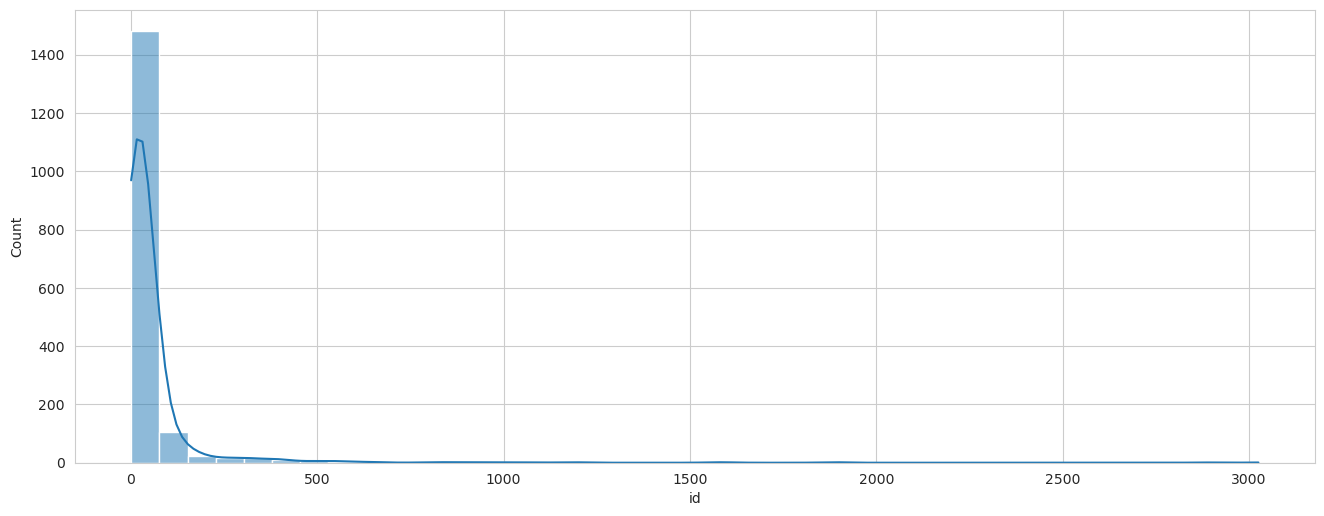

In [46]:
plt.figure(figsize=(16, 6))
sns.histplot(coll, x="id", bins=40, kde=True)

In [625]:
dffcf = dffc.loc[dffc['contig'].isin(good_names.to_list())]

In [82]:
dff.dropna(subset=['CAZy'])['id']

105        c10_14
130       c1000_1
147       c1001_7
148       c1001_0
194       c1003_8
           ...   
93588     s965_18
93608    s965_179
93701     s965_48
93711      s965_2
93713     s965_10
Name: id, Length: 1233, dtype: object

In [99]:
df84 = dff.loc[dff['contig'] == 'c84']

In [93]:
test_bool = ~dff.loc[dff['contig'] == 'c84']['CAZy'].isnull()

In [109]:
df84[['CAZy']]

,CAZy
82242,NaN
82243,NaN
82244,NaN
82245,NaN
82246,NaN
...,...
85262,NaN
85263,NaN
85264,NaN
85265,NaN


In [117]:
coll_list = coll[:20]['contig'].to_list()
coll_list

['c84',
 'c12',
 'c38',
 'c31',
 'c208',
 'c150',
 'c194',
 'c118',
 'c43',
 'c86',
 'c45',
 'c262',
 'c18',
 'c225',
 'c120',
 'c828',
 'c222',
 'c151',
 's192',
 'c15']

In [154]:
coll_df_list = [dff.loc[dff['contig'] == i] for i in coll_list]
future_dict = zip(coll_list, coll_df_list)
coll_dict = dict(future_dict)

In [155]:
coll_dict.keys()

dict_keys(['c84', 'c12', 'c38', 'c31', 'c208', 'c150', 'c194', 'c118', 'c43', 'c86', 'c45', 'c262', 'c18', 'c225', 'c120', 'c828', 'c222', 'c151', 's192', 'c15'])

In [140]:
coll_dict['c84']

,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
82242,756,1612,179.0,-,.,c84_2581,110319.CF8_1714,5.930000e-44,179.0,"COG4965@1|root,COG4965@2|Bacteria,2I2Z3@201174...",201174|Actinobacteria,U,overlaps another CDS with the same product name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2SSF,c84,2581
82243,1645,2474,238.0,-,.,c84_2309,313589.JNB_00785,9.240000e-65,238.0,"COG4965@1|root,COG4965@2|Bacteria,2GN6E@201174...",201174|Actinobacteria,U,"Type II secretion system (T2SS), protein F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2SSF,c84,2309
82244,2509,3889,389.0,-,.,c84_1667,313589.JNB_00780,8.890000e-115,389.0,"COG4962@1|root,COG4962@2|Bacteria,2GKKJ@201174...",201174|Actinobacteria,U,Type II/IV secretion system protein,NaN,NaN,NaN,ko:K02283,NaN,NaN,NaN,NaN,"ko00000,ko02035,ko02044",NaN,NaN,NaN,T2SSE,c84,1667
82245,4024,4863,266.0,-,.,c84_2166,1035308.AQYY01000001_gene1285,1.430000e-74,266.0,"COG0455@1|root,COG0455@2|Bacteria",2|Bacteria,D,bacterial-type flagellum organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c84,2166
82246,4881,5426,137.0,-,.,c84_2758,397278.JOJN01000013_gene2576,7.310000e-31,137.0,"COG1261@1|root,COG1261@2|Bacteria,2HKN7@201174...",201174|Actinobacteria,NO,SAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAF,c84,2758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85262,3646950,3647591,197.0,+,.,c84_2479,1035308.AQYY01000001_gene1284,1.420000e-51,197.0,"COG1261@1|root,COG1261@2|Bacteria,1W1GR@1239|F...",186801|Clostridia,NO,SAF domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAF,c84,2479
85263,3647600,3648383,197.0,+,.,c84_2484,110319.CF8_2348,5.150000e-51,197.0,"COG1192@1|root,COG1192@2|Bacteria,2I57A@201174...",201174|Actinobacteria,D,Involved in chromosome partitioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c84,2484
85264,3648473,3649988,503.0,+,.,c84_1228,1035308.AQYY01000001_gene1286,1.550000e-153,503.0,"COG4962@1|root,COG4962@2|Bacteria,1TQ0Z@1239|F...",186801|Clostridia,U,type II secretion system protein E,NaN,NaN,NaN,ko:K02283,NaN,NaN,NaN,NaN,"ko00000,ko02035,ko02044",NaN,NaN,NaN,T2SSE,c84,1228
85265,3650012,3650852,289.0,+,.,c84_2075,1035308.AQYY01000001_gene1287,2.190000e-82,289.0,"COG4965@1|root,COG4965@2|Bacteria",2|Bacteria,U,Type ii secretion system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2SSF,c84,2075


In [ ]:
coll_df_list

In [134]:
topdf

""


In [875]:
dffcf45 = dffcf.loc[dffcf['contig'] == 'c45']

<!-- ## THIS -->

<AxesSubplot:>

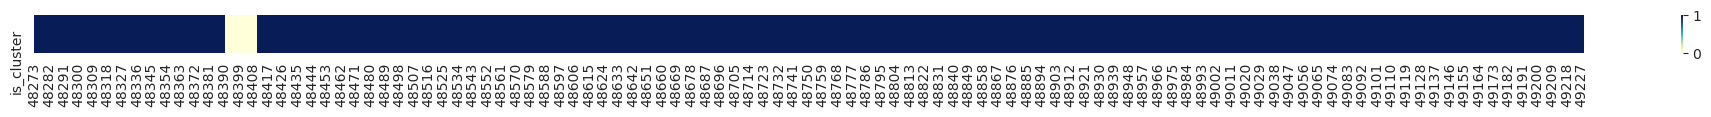

In [876]:
plt.figure(figsize=(25, 0.5))
dffcf45_local = dffcf45.copy()
dffcf45_local['is_cluster'] = ~dffcf45_local['is_cluster']
sns.heatmap(dffcf45_local[['is_cluster']].transpose(), cmap="YlGnBu")
# reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)

In [730]:
dffcf.loc[dffcf['is_cazy'] == True].shape[0]

961

In [733]:
dffcf.loc[dffcf['is_cluster'] == True].shape[0]

961

<AxesSubplot:>

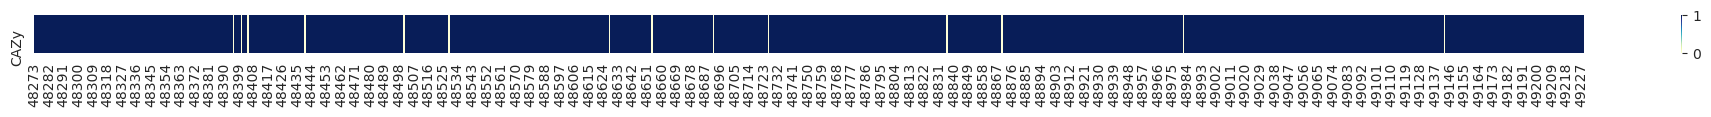

In [877]:
plt.figure(figsize=(25, 0.5))
sns.heatmap(dffcf45[['CAZy']].isna().transpose(),
            cmap="YlGnBu")

<AxesSubplot:>

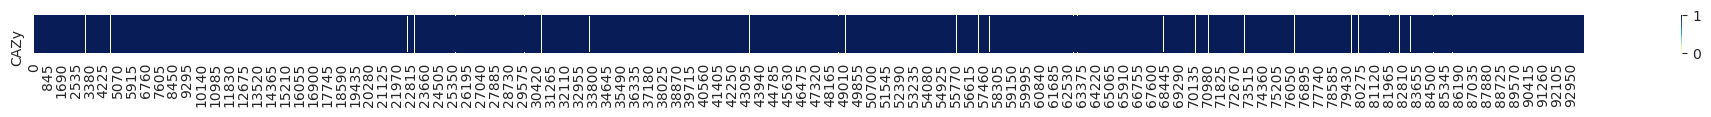

In [267]:
plt.figure(figsize=(25, 0.5))
sns.heatmap(dff[['CAZy']].isna().transpose(), cmap="YlGnBu")

In [224]:
len(df84)/100

30.25

In [676]:
dffcf.loc[dffcf['contig'] == 'c828']

,index,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number,is_cazy,is_cluster
60126,80970,1,426,279.0,+,.,c828_433,1502724.FF80_02687,6.600000e-78,279.0,"COG0448@1|root,COG0448@2|Bacteria,1MVTC@1224|P...",28211|Alphaproteobacteria,H,"Catalyzes the synthesis of ADP-glucose, a suga...",glgC,NaN,2.7.7.27,ko:K00975,"ko00500,ko00520,ko01100,ko01110,ko02026,map005...",M00565,R00948,RC00002,"ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,NTP_transferase,c828,433,False,False
60127,80971,429,3512,1165.0,+,.,c828_28,663610.JQKO01000001_gene856,0.000000e+00,1165.0,"COG0033@1|root,COG0297@1|root,COG0033@2|Bacter...",28211|Alphaproteobacteria,G,"Phosphoglucomutase/phosphomannomutase, alpha/b...",pgm,NaN,5.4.2.2,ko:K01835,"ko00010,ko00030,ko00052,ko00230,ko00500,ko0052...",M00549,"R00959,R01057,R08639",RC00408,"ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,"PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV",c828,28,False,False
60128,80972,3535,5520,1121.0,+,.,c828_33,1502724.FF80_02684,0.000000e+00,1121.0,"COG1523@1|root,COG1523@2|Bacteria,1MU19@1224|P...",28211|Alphaproteobacteria,G,Carbohydrate-binding module 48 (Isoamylase N-t...,glgX,NaN,"3.2.1.196,3.2.1.68","ko:K01214,ko:K02438","ko00500,ko01100,ko01110,map00500,map01100,map0...",M00565,"R02111,R09995,R11261",NaN,"ko00000,ko00001,ko00002,ko01000",NaN,"CBM48,GH13",NaN,"Alpha-amylase,CBM_48",c828,33,True,True
60129,80973,5532,6248,233.0,+,.,c828_478,1535287.JP74_07280,2.700000e-64,233.0,"COG1409@1|root,COG1409@2|Bacteria,1MWKX@1224|P...",28211|Alphaproteobacteria,G,Hydrolyzes cAMP to 5'-AMP. Plays an important ...,cpdA,NaN,3.1.4.53,ko:K03651,"ko00230,ko02025,map00230,map02025",NaN,R00191,RC00296,"ko00000,ko00001,ko01000",NaN,NaN,NaN,Metallophos,c828,478,False,False
60130,80974,6315,7154,298.0,-,.,c828_410,1432050.IE4771_CH00128,1.440000e-86,298.0,"COG0596@1|root,COG0596@2|Bacteria,1N3G3@1224|P...",28211|Alphaproteobacteria,S,Alpha beta hydrolase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abhydrolase_1,c828,410,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60789,81633,756894,758486,530.0,+,.,c828_207,1294273.roselon_03143,3.030000e-163,530.0,"COG0512@1|root,COG0547@1|root,COG0512@2|Bacter...",28211|Alphaproteobacteria,E,Catalyzes the transfer of the phosphoribosyl g...,trpD,"GO:0000162,GO:0003674,GO:0003824,GO:0004048,GO...","2.4.2.18,4.1.3.27","ko:K00766,ko:K13497","ko00400,ko01100,ko01110,ko01130,ko01230,map004...",M00023,"R00985,R00986,R01073","RC00010,RC00440,RC02148,RC02414","ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,"Glycos_trans_3N,Glycos_transf_3",c828,207,False,False
60790,81634,758507,759280,144.0,+,.,c828_254,28583.AMAG_04963T0,4.750000e-29,144.0,"COG0134@1|root,COG0135@1|root,COG0147@1|root,C...",4751|Fungi,E,Trifunctional enzyme bearing the Gln amidotran...,TRP3,"GO:0000162,GO:0003674,GO:0003824,GO:0004049,GO...","4.1.1.48,4.1.3.27,5.3.1.24","ko:K01656,ko:K13501","ko00400,ko01100,ko01110,ko01130,ko01230,map004...",M00023,"R00985,R00986,R03508,R03509","RC00010,RC00944,RC00945,RC02148,RC02414","ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,"GATase,IGPS,PRAI",c828,254,False,False
60791,81635,759310,759783,236.0,+,.,c828_462,1502724.FF80_00101,1.230000e-66,236.0,"COG0315@1|root,COG0315@2|Bacteria,1RCYZ@1224|P...",28211|Alphaproteobacteria,H,"Catalyzes the conversion of (8S)-3',8-cyclo-7,...",moaC,NaN,4.6.1.17,ko:K03637,"ko00790,ko01100,ko04122,map00790,map01100,map0...",NaN,R11372,RC03425,"ko00000,ko00001,ko01000",NaN,NaN,NaN,MoaC,c828,462,False,False
60792,81636,759789,760980,511.0,+,.,c828_218,1502724.FF80_00100,5.520000e-159,511.0,"COG0303@1|root,COG0303@2|Bacteria,1MVD5@1224|P...",28211|Alphaproteobacteria,H,MoeA N-terminal region (domain I and II),moeA,"GO:0003674,GO:0003824,GO:0005488,GO:0005

In [912]:
df_local[['is_cluster']]

,is_cluster
14088,False
14089,False
14090,False
14091,False
14092,False
...,...
14652,False
14653,False
14654,False
14655,False


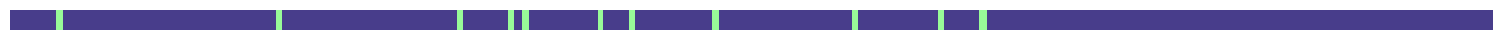

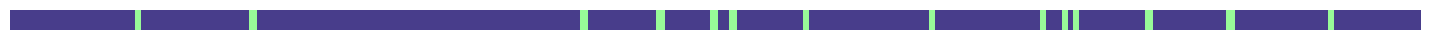

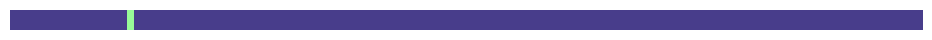

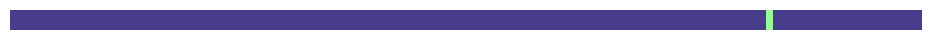

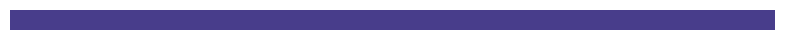

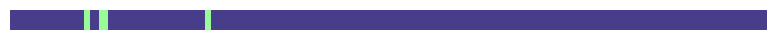

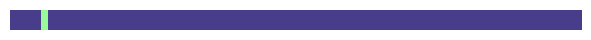

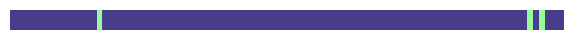

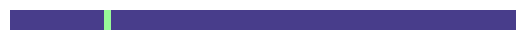

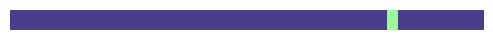

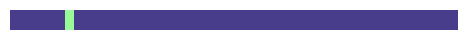

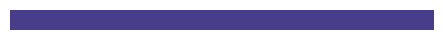

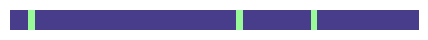

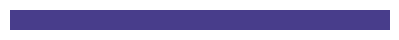

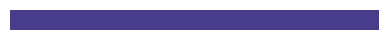

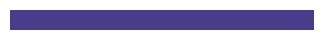

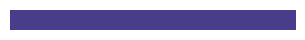

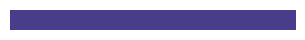

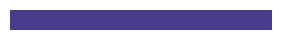

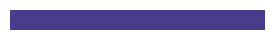

In [921]:

for i in coll_list:
    df_local = dffcf.loc[dffcf['contig'] == i]
    plt.figure(figsize=(len(df_local)/200, 0.5))
    s = sns.heatmap(df_local[['is_cluster']].transpose(), xticklabels=False, yticklabels=False, cmap=['darkslateblue', 'palegreen'], cbar=False)
    plt.tight_layout()
    plt.show(s)
    

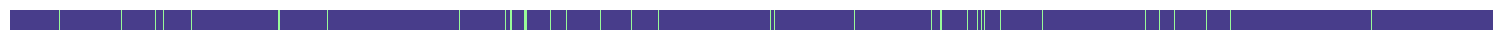

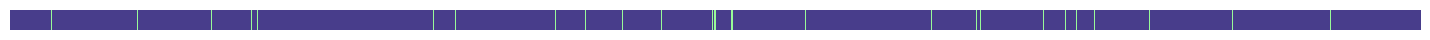

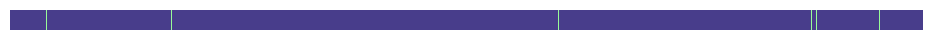

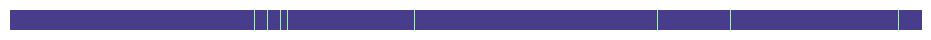

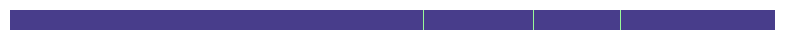

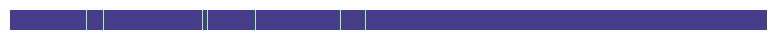

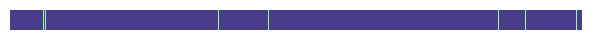

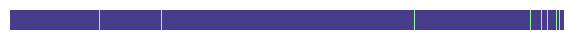

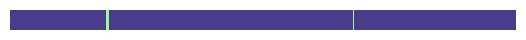

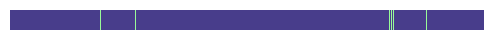

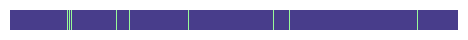

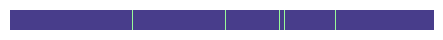

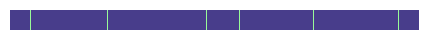

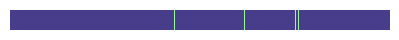

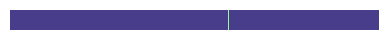

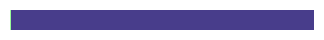

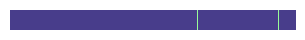

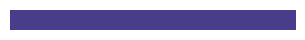

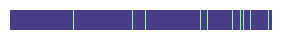

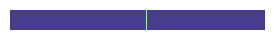

In [922]:
for i in coll_list:
    df_local = dff.loc[dff['contig'] == i]
    plt.figure(figsize=(len(df_local)/200, 0.5))
    s = sns.heatmap(df_local[['CAZy']].isna().transpose(), xticklabels=False, yticklabels=False, cmap=['palegreen', 'darkslateblue'], cbar=False)
    plt.tight_layout()
    plt.show(s)

<AxesSubplot:>

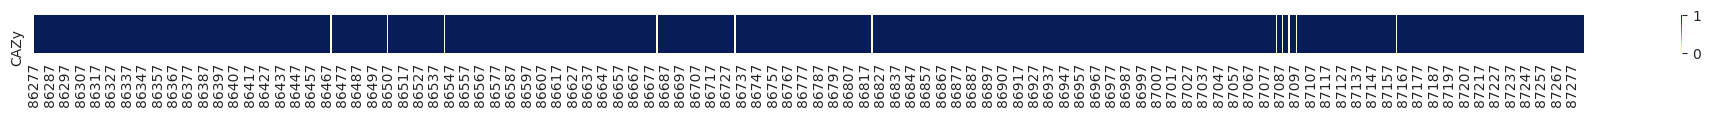

In [309]:
plt.figure(figsize=(25, 0.5))
sns.heatmap(dff.loc[dff['contig'] == 'c86'][['CAZy']].isna().transpose(), cmap="YlGnBu")

In [277]:
test_bool = ~dff.loc[dff['contig'] == 'c86']['CAZy'].isnull()
dff.loc[dff['contig'] == 'c86'][test_bool]

,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
86470,216383,219580,1883.0,-,.,c86_0,1502724.FF80_01209,0.000000e+00,1883.0,"COG0383@1|root,COG0383@2|Bacteria,1R3Q8@1224|P...",28211|Alphaproteobacteria,G,"Alpha mannosidase, middle domain",mngB,NaN,3.2.1.24,ko:K01191,"ko00511,map00511",NaN,NaN,NaN,"ko00000,ko00001,ko01000,ko04131",NaN,GH38,NaN,"Alpha-mann_mid,Glyco_hydro_38,Glyco_hydro_38C",c86,0
86507,265142,266266,389.0,+,.,c86_496,1144343.PMI41_02970,4.050000e-116,389.0,"COG4225@1|root,COG4225@2|Bacteria,1NQTS@1224|P...",28211|Alphaproteobacteria,S,Glycosyl Hydrolase Family 88,NaN,NaN,3.2.1.180,ko:K18581,NaN,NaN,R10867,"RC00049,RC02427","ko00000,ko01000",NaN,GH88,NaN,Glyco_hydro_88,c86,496
86544,306489,307859,259.0,-,.,c86_715,1536769.P40081_32885,4.540000e-70,259.0,"COG1621@1|root,COG1621@2|Bacteria,1U0EK@1239|F...",91061|Bacilli,G,glycoside hydrolase,NaN,NaN,3.2.1.26,ko:K01193,"ko00052,ko00500,ko01100,map00052,map00500,map0...",NaN,"R00801,R00802,R02410,R03635,R03921,R06088","RC00028,RC00077","ko00000,ko00001,ko01000",NaN,GH32,NaN,"DUF4975,Glyco_hydro_32C,Glyco_hydro_32N",c86,715
86682,449465,451048,908.0,-,.,c86_59,1502724.FF80_01736,5.490000e-295,908.0,"COG0815@1|root,COG0815@2|Bacteria,1MUBU@1224|P...",28211|Alphaproteobacteria,M,Transfers the fatty acyl group on membrane lip...,lnt,NaN,NaN,ko:K03820,NaN,NaN,NaN,NaN,"ko00000,ko01000",NaN,GT2,NaN,CN_hydrolase,c86,59
86733,500246,502903,1185.0,+,.,c86_25,1502724.FF80_01793,0.000000e+00,1185.0,"COG0744@1|root,COG0744@2|Bacteria,1QTST@1224|P...",28211|Alphaproteobacteria,M,"Penicillin-binding protein, 1A family",pbpC,NaN,"2.4.1.129,3.4.16.4",ko:K05366,"ko00550,ko01100,ko01501,map00550,map01100,map0...",NaN,NaN,NaN,"ko00000,ko00001,ko01000,ko01003,ko01011",NaN,GT51,NaN,"Transgly,Transpeptidase",c86,25
86822,603095,604702,1018.0,-,.,c86_44,1502724.FF80_01677,0.000000e+00,1018.0,"COG3507@1|root,COG3507@2|Bacteria,1NNX4@1224|P...",28211|Alphaproteobacteria,G,Glycosyl hydrolases family 43,xynA,NaN,3.2.1.37,ko:K01198,"ko00520,ko01100,map00520,map01100",NaN,R01433,RC00467,"ko00000,ko00001,ko01000",NaN,GH43,NaN,Glyco_hydro_43,c86,44
87085,865979,867631,663.0,-,.,c86_164,1144310.PMI07_005588,4.740000e-209,663.0,"COG2272@1|root,COG2272@2|Bacteria,1MVQZ@1224|P...",28211|Alphaproteobacteria,I,Belongs to the type-B carboxylesterase lipase ...,NaN,NaN,NaN,ko:K03929,NaN,NaN,NaN,NaN,"ko00000,ko01000",NaN,CE10,NaN,"COesterase,PBP",c86,164
87089,871857,874891,787.0,+,.,c86_109,1530186.JQEY01000006_gene3365,5.570000e-245,787.0,"COG0438@1|root,COG1215@1|root,COG1216@1|root,C...",28211|Alphaproteobacteria,M,COG0463 Glycosyltransferases involved in cell ...,exoA,"GO:0005575,GO:0005623,GO:0005886,GO:0016020,GO...",NaN,ko:K16557,NaN,NaN,NaN,NaN,"ko00000,ko01000,ko01003",NaN,GT2,NaN,Glycos_transf_2,c86,109
87093,880186,881367,382.0,+,.,c86_511,1502724.FF80_03373,9.410000e-114,382.0,"COG1216@1|root,COG1216@2|Bacteria",2|Bacteria,V,"Glycosyl transferase, family 2",NaN,NaN,NaN,"ko:K16555,ko:K16564",NaN,NaN,NaN,NaN,"ko00000,ko01000,ko01003",NaN,GT2,NaN,Glycos_transf_2,c86,511
87098,886000,886773,411.0,-,.,c86_435,1535287.JP74_22090,5.230000e-126,411.0,"COG2273@1|root,COG2273@2|Bacteria,1RANY@1224|P...",28211|Alphaproteobacteria,G,Beta-glucanase Beta-glucan synthetase,exoK,NaN,NaN,ko:K16559,NaN,NaN,NaN,NaN,"ko00000,ko01000",NaN,GH16,NaN,Glyco_hydro_16,c86,435


In [130]:
def sizeof_fmt(num, suffix="B"):
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"


In [132]:
sizeof_fmt(sys.getsizeof(df))

'115.8MiB'

In [91]:
dfcaz = df.dropna(subset=['CAZy'])

In [121]:
dfcaz

NameError: name 'dfcaz' is not defined

In [202]:
dff

,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number
0,3,110,63.2,+,.,c1_59,1287116.X734_02680,1.200000e-05,63.2,"COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|P...",28211|Alphaproteobacteria,C,Belongs to the heme-copper respiratory oxidase...,NaN,NaN,1.9.3.1,"ko:K02274,ko:K15408","ko00190,ko01100,map00190,map01100",M00155,R00081,RC00016,"ko00000,ko00001,ko00002,ko01000","3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6",NaN,NaN,COX1,c1,59
1,114,478,112.0,+,.,c1_55,1028801.RG1141_CH23470,1.090000e-24,112.0,"2E5ZP@1|root,330P3@2|Bacteria,1MZC5@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,55
2,529,1106,148.0,+,.,c1_51,1287116.X734_02670,2.850000e-36,148.0,"COG3336@1|root,COG3336@2|Bacteria,1RKGB@1224|P...",28211|Alphaproteobacteria,S,Cytochrome c oxidase caa3 assembly factor (Caa...,NaN,NaN,NaN,ko:K02351,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Caa3_CtaG,c1,51
3,1336,1846,69.3,-,.,c1_58,1144310.PMI07_002346,9.860000e-09,69.3,"2ERFU@1|root,33J1D@2|Bacteria,1NGMN@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,58
4,2632,2867,112.0,+,.,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,NaN,NaN,ko:K09951,NaN,NaN,NaN,NaN,"ko00000,ko02048",NaN,NaN,NaN,CRISPR_Cas2,c1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,418611,419039,243.0,-,.,s965_225,1220589.CD32_08780,1.970000e-69,243.0,"2EFEX@1|root,3397Q@2|Bacteria,1VZWX@1239|Firmi...",1239|Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,225
93736,419049,419478,206.0,-,.,s965_251,66692.ABC1059,1.340000e-56,206.0,"COG3210@1|root,COG3210@2|Bacteria,1W4ZU@1239|F...",1239|Firmicutes,U,"domain, Protein",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,251
93737,420460,421947,337.0,-,.,s965_194,411467.BACCAP_03137,1.610000e-88,337.0,"2DP3A@1|root,330CA@2|Bacteria,1UQ9I@1239|Firmi...",186801|Clostridia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gly_rich,s965,194
93738,422932,423222,92.8,-,.,s965_307,1122990.BAJH01000032_gene2593,3.630000e-14,92.8,"2EBII@1|root,335J1@2|Bacteria,4PPQP@976|Bacter...",2|Bacteria,S,Glycine rich protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gly_rich,Mfa_like_1",s965,307


In [278]:
dffc = dff.copy()

### Find cluster function

In [884]:
def find_cluster(input_series, range_number):
    if input_series.any():
        timecol = pd.Series([], dtype = "bool")
        for i in [i for i in range(- range_number, 0)] + [i for i in range(1, range_number + 1)]:
            if timecol.empty:
                timecol = input_series & input_series.shift(i)
            else:
                timecol = input_series & input_series.shift(i) | timecol
        if timecol.any():
            icol = timecol[timecol].index.values
            index = 0
            ilist = [icol[0]]
            for i in icol[1:]:
                index += 1
                if i - icol[index - 1] > range_number:
                    ilist.append(icol[index - 1]) 
                    ilist.append(i)     
            ilist.append(icol[-1])
            ranges = [[ilist[i], ilist[i+1]] for i in range(0, len(ilist)-1, 2)]
            for i in ranges:
                i[0] = i[0] - range_number
                i[1] = i[1] + range_number
            if ranges[0][0] < timecol.index.values[0]:
                ranges[0][0] = timecol.index.values[0]
            if ranges[-1][1] > timecol.index.values[-1]:
                ranges[-1][1] = timecol.index.values[-1]
            timecol2 = timecol.copy()
            new_ranges = []
            for i in ranges:
                l = [a for a in range(i[0], i[1]+1)]
                new_ranges.append(l)
            new_ranges = set([item for sublist in new_ranges for item in sublist])
            timecol2.loc[new_ranges] = True
            return timecol2
        else:
            return timecol
    else:
        return input_series

find_cluster(dffcf['is_cazy'], 5)

CPU times: user 63.4 ms, sys: 0 ns, total: 63.4 ms
Wall time: 61.4 ms


0        False
1        False
2        False
3        False
4        False
         ...  
70148    False
70149    False
70150    False
70151    False
70152    False
Name: is_cazy, Length: 70153, dtype: bool

In [885]:
%%time

con = dffcf['contig'].unique()
start = pd.Series([], dtype = "bool")

for i in con:
    df_local = dffcf.loc[dffcf['contig'] == i]
    finish = find_cluster(df_local['is_cazy'], 5)
    start = pd.concat([start, finish])

start
   

CPU times: user 2.81 s, sys: 23.1 ms, total: 2.83 s
Wall time: 2.83 s


0        False
1        False
2        False
3        False
4        False
         ...  
70148    False
70149    False
70150    False
70151    False
70152    False
Length: 70153, dtype: bool

In [886]:
dffcf['is_cluster'] = start

In [576]:
con = dffc['contig'].unique()
len(con)

1681

In [573]:
%%time

con = dffc['contig'].unique()
for i in con:
    dffc.loc[dffc['contig'] == i]


CPU times: user 9.38 s, sys: 5.3 ms, total: 9.39 s
Wall time: 9.39 s


In [539]:
dffc['is_cazy'] = ~dffc['CAZy'].isna()
dffc

,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number,is_cazy
0,3,110,63.2,+,.,c1_59,1287116.X734_02680,1.200000e-05,63.2,"COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|P...",28211|Alphaproteobacteria,C,Belongs to the heme-copper respiratory oxidase...,NaN,NaN,1.9.3.1,"ko:K02274,ko:K15408","ko00190,ko01100,map00190,map01100",M00155,R00081,RC00016,"ko00000,ko00001,ko00002,ko01000","3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6",NaN,NaN,COX1,c1,59,False
1,114,478,112.0,+,.,c1_55,1028801.RG1141_CH23470,1.090000e-24,112.0,"2E5ZP@1|root,330P3@2|Bacteria,1MZC5@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,55,False
2,529,1106,148.0,+,.,c1_51,1287116.X734_02670,2.850000e-36,148.0,"COG3336@1|root,COG3336@2|Bacteria,1RKGB@1224|P...",28211|Alphaproteobacteria,S,Cytochrome c oxidase caa3 assembly factor (Caa...,NaN,NaN,NaN,ko:K02351,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Caa3_CtaG,c1,51,False
3,1336,1846,69.3,-,.,c1_58,1144310.PMI07_002346,9.860000e-09,69.3,"2ERFU@1|root,33J1D@2|Bacteria,1NGMN@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,58,False
4,2632,2867,112.0,+,.,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,NaN,NaN,ko:K09951,NaN,NaN,NaN,NaN,"ko00000,ko02048",NaN,NaN,NaN,CRISPR_Cas2,c1,54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93735,418611,419039,243.0,-,.,s965_225,1220589.CD32_08780,1.970000e-69,243.0,"2EFEX@1|root,3397Q@2|Bacteria,1VZWX@1239|Firmi...",1239|Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,225,False
93736,419049,419478,206.0,-,.,s965_251,66692.ABC1059,1.340000e-56,206.0,"COG3210@1|root,COG3210@2|Bacteria,1W4ZU@1239|F...",1239|Firmicutes,U,"domain, Protein",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,251,False
93737,420460,421947,337.0,-,.,s965_194,411467.BACCAP_03137,1.610000e-88,337.0,"2DP3A@1|root,330CA@2|Bacteria,1UQ9I@1239|Firmi...",186801|Clostridia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gly_rich,s965,194,False
93738,422932,423222,92.8,-,.,s965_307,1122990.BAJH01000032_gene2593,3.630000e-14,92.8,"2EBII@1|root,335J1@2|Bacteria,4PPQP@976|Bacter...",2|Bacteria,S,Glycine rich protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gly_rich,Mfa_like_1",s965,307,False


### Count cluster

In [1022]:
x = np.array(["A", "B"])
np.repeat(x, [2, 3], axis=0)

array(['A', 'A', 'B', 'B', 'B'], dtype='<U1')

In [1030]:
x = np.array([False, True, False, True, False, True, False, True, False])
test = pd.DataFrame({'hue' : np.repeat(x, [2, 3, 5, 1, 2, 1, 6, 1, 5], axis=0)}) 
test


,hue
0,False
1,False
2,True
3,True
4,True
5,False
6,False
7,False
8,False
9,False


In [1031]:

def count_cluster(input_series, range_number):
    if input_series.any():
        timecol = pd.Series([], dtype = "bool")
        for i in [i for i in range(- range_number, 0)] + [i for i in range(1, range_number + 1)]:
            if timecol.empty:
                timecol = input_series & input_series.shift(i)
            else:
                timecol = input_series & input_series.shift(i) | timecol

#         return timecol.sum()
        return timecol

count_cluster(test['hue'], 5)


0     False
1     False
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: hue, dtype: bool

## Add Class information

In [ ]:
#import annotations
df = pd.read_csv("/home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3/46.faa.emapper.annotations", delimiter="\t")
df = df.replace('-', np.nan)
self.table['is_cazy'] = ~self.table['CAZy'].isna()

# import gff, merging
gff = gffpd.read_gff3("/home/gladkov2/storage/metagenome/bact_4x/new_con/diamond/con/eggnog3/46.faa.emapper.gff")
gff.df["attributes"] = gff.df["attributes"].str.split(';', 1).str[0].str.split('=', 1).str[1]
df = df.rename(columns={'#query': 'id'})
gff.df = gff.df.rename(columns={'attributes': 'id'})
dff = pd.merge(gff.df, df, on='id')
dff = dff.drop(columns=['seq_id', 'type', 'source'])

#contig lenght filtration
good_names = coll.loc[coll['id'] > 39]['contig']
dffcf = dffc.loc[dffc['contig'].isin(good_names.to_list())]

#contig visualisation


#clusters visualisations


#

def read_gff3(input_file):
    return Gff3DataFrame(input_file)


In [ ]:
class EggnogCAZ:
    def __init__(self, table):
        self.type = "ann_and_gff"
        self.anno = input_annotation
        self.gff = input_gff
        self.table
    
    def add_cazy_column(self.table):
        self.table['is_cazy'] = ~self.table['CAZy'].isna()
    
    
        
    def count_cluster_in_contig(input_series, range_number):
        if input_series.any():
            timecol = pd.Series([], dtype = "bool")
            for i in [i for i in range(- range_number, 0)] + [i for i in range(1, range_number + 1)]:
                if timecol.empty:
                    timecol = input_series & input_series.shift(i)
                else:
                    timecol = input_series & input_series.shift(i) | timecol
            if timecol.any():
                icol = timecol[timecol].index.values
                index = 0
                ilist = [icol[0]]
                for i in icol[1:]:
                    index += 1
                    if 
                    i - icol[index - 1] > range_number:
                        ilist.append(icol[index - 1]) 
                        ilist.append(i)     
                ilist.append(icol[-1])
                ranges = [[ilist[i], ilist[i+1]] for i in range(0, len(ilist)-1, 2)]
                if ranges[0][0] < timecol.index.values[0]:
                    ranges[0][0] = timecol.index.values[0]
                if ranges[-1][1] > timecol.index.values[-1]:
                    ranges[-1][1] = timecol.index.values[-1]
                timecol2 = timecol.copy()
                new_ranges = []
                for i in ranges:
                    l = [a for a in range(i[0], i[1]+1)]
                    new_ranges.append(l)
                new_ranges = set([item for sublist in new_ranges for item in sublist])
                timecol2.loc[new_ranges] = True
                return timecol2
            else:
                return timecol
        else:
            return input_series
       
          
    
def find_cluster_wmore(input_series, range_number):
    if input_series.any():
        timecol = pd.Series([], dtype = "bool")
        for i in [i for i in range(- range_number, 0)] + [i for i in range(1, range_number + 1)]:
            if timecol.empty:
                timecol = input_series & input_series.shift(i)
            else:
                timecol = input_series & input_series.shift(i) | timecol
        if timecol.any():
            icol = timecol[timecol].index.values
            index = 0
            ilist = [icol[0]]
            for i in icol[1:]:
                index += 1
                if i - icol[index - 1] > range_number:
                    ilist.append(icol[index - 1]) 
                    ilist.append(i)     
            ilist.append(icol[-1])
            ranges = [[ilist[i], ilist[i+1]] for i in range(0, len(ilist)-1, 2)]
#             for i in ranges:
#                 i[0] = i[0] - range_number
#                 i[1] = i[1] + range_number
            if ranges[0][0] < timecol.index.values[0]:
                ranges[0][0] = timecol.index.values[0]
            if ranges[-1][1] > timecol.index.values[-1]:
                ranges[-1][1] = timecol.index.values[-1]
            timecol2 = timecol.copy()
            new_ranges = []
            for i in ranges:
                l = [a for a in range(i[0], i[1]+1)]
                new_ranges.append(l)
            new_ranges = set([item for sublist in new_ranges for item in sublist])
            timecol2.loc[new_ranges] = True
            return timecol2
        else:
            return timecol
    else:
        return input_series

resu = find_cluster_wmore(test['hue'], 4)
(resu & (resu != resu.shift(1))).sum()


In [1053]:
def find_cluster_wmore(input_series, range_number):
    if input_series.any():
        timecol = pd.Series([], dtype = "bool")
        for i in [i for i in range(- range_number, 0)] + [i for i in range(1, range_number + 1)]:
            if timecol.empty:
                timecol = input_series & input_series.shift(i)
            else:
                timecol = input_series & input_series.shift(i) | timecol
        if timecol.any():
            icol = timecol[timecol].index.values
            index = 0
            ilist = [icol[0]]
            for i in icol[1:]:
                index += 1
                if i - icol[index - 1] > range_number:
                    ilist.append(icol[index - 1]) 
                    ilist.append(i)     
            ilist.append(icol[-1])
            ranges = [[ilist[i], ilist[i+1]] for i in range(0, len(ilist)-1, 2)]
#             for i in ranges:
#                 i[0] = i[0] - range_number
#                 i[1] = i[1] + range_number
            if ranges[0][0] < timecol.index.values[0]:
                ranges[0][0] = timecol.index.values[0]
            if ranges[-1][1] > timecol.index.values[-1]:
                ranges[-1][1] = timecol.index.values[-1]
            timecol2 = timecol.copy()
            new_ranges = []
            for i in ranges:
                l = [a for a in range(i[0], i[1]+1)]
                new_ranges.append(l)
            new_ranges = set([item for sublist in new_ranges for item in sublist])
            timecol2.loc[new_ranges] = True
            return timecol2
        else:
            return timecol
    else:
        return input_series

resu = find_cluster_wmore(test['hue'], 4)
(resu & (resu != resu.shift(1))).sum()


2

### count number of cluster in community 4

In [1066]:
con = dffcf['contig'].unique()
start = pd.Series([], dtype = "bool")

for i in con:
    df_local = dffcf.loc[dffcf['contig'] == i]
    finish = find_cluster_wmore(df_local['is_cazy'], 5)
    start = pd.concat([start, finish])

(start & (start != start.shift(1))).sum()

135

In [1067]:
dffcf['is_cazy'].sum()

961

### add all to one chunk -- from import to result

In [1064]:
dir(gff)
import inspect
lines = inspect.getsource(gff.attributes_to_columns)
print(lines)

    def attributes_to_columns(self) -> pd.DataFrame:
        """Saving each attribute-tag to a single column.

        Attribute column will be split by the tags in the single columns.
        For this method only a pandas DataFrame and not a Gff3DataFrame
        will be returned. Therefore, this data frame can not be saved as
        gff3 file.

        :return: pandas dataframe, whereby the attribute column of the gff3
                file are splitted into the different attribute tags
        :rtype: pandas DataFrame
        """
        attribute_df = self.df.copy()
        df_attributes = attribute_df.loc[:, "seq_id":"attributes"]
        attribute_df["at_dic"] = attribute_df.attributes.apply(
            lambda attributes: dict(
                [
                    key_value_pair.split(sep="=", maxsplit=1)
                    for key_value_pair in attributes.split(";")
                ]
            )
        )
        attribute_df["at_dic_keys"] = attribute_df["at_dic"].apply(
 

In [932]:
%%time

con = dffcf['contig'].unique()
start = pd.Series([], dtype = "bool")

for i in con:
    df_local = dffcf.loc[dffcf['contig'] == i]
    finish = count_cluster(df_local['is_cazy'], 5)
    start = pd.concat([start, finish])

start


CPU times: user 2.72 s, sys: 10.1 ms, total: 2.73 s
Wall time: 2.73 s


62       False
63       False
64       False
65       False
66       False
         ...  
70148    False
70149    False
70150    False
70151    False
70152    False
Length: 58983, dtype: bool

In [933]:
start[start == True].shape[0]

321

In [934]:
len(start[start == True])

321

In [80]:
gff.df.loc[gff.df['seq_id'].start(['s'])]

,seq_id,source,type,start,end,score,strand,phase,attributes


In [83]:
gff.df.loc[gff.df['seq_id'].str.startswith('s', na=False)].drop_duplicates(subset = ['seq_id'])

,seq_id,source,type,start,end,score,strand,phase,attributes
92840,s192,eggNOG-mapper,CDS,1245,2483,194.0,-,.,ID=s192_497;em_target=658086.HMPREF0994_07034;...
93423,s965,eggNOG-mapper,CDS,1,502,202.0,-,.,ID=s965_257;em_target=720554.Clocl_4194;em_sco...


In [84]:
df.loc[df["#query"].str.startswith('s', na=False)].drop_duplicates(subset = ['#query'])

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
3645,s965_0,324057.Pjdr2_0964,0.000000,1816.0,"COG2755@1|root,COG5434@1|root,COG2755@2|Bacter...",1239|Firmicutes,E,S-layer homology domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLH
3646,s965_1,215803.DB30_5030,0.000000,1779.0,"COG4733@1|root,COG4733@2|Bacteria,1R6EB@1224|P...",28221|Deltaproteobacteria,S,Carbohydrate binding domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CBM_20,CBM_25,fn3"
3647,s965_2,268407.PWYN_10865,0.000000,1378.0,"COG1472@1|root,COG1472@2|Bacteria,1TPH5@1239|F...",91061|Bacilli,G,Belongs to the glycosyl hydrolase 3 family,NaN,NaN,3.2.1.21,ko:K05349,"ko00460,ko00500,ko00940,ko01100,ko01110,map004...",NaN,"R00026,R02558,R02887,R02985,R03527,R04949,R049...","RC00049,RC00059,RC00171,RC00262,RC00397,RC0045...","ko00000,ko00001,ko01000",NaN,GH3,NaN,"Fn3-like,Glyco_hydro_3,Glyco_hydro_3_C"
3648,s965_3,1007103.AFHW01000030_gene2367,0.000000,1192.0,"COG0745@1|root,COG2972@1|root,COG5002@1|root,C...",91061|Bacilli,T,Histidine kinase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7TMR-DISM_7TM,HATPase_c,HisKA,His_kinase,Respo..."
3649,s965_4,1121346.KB899837_gene1244,0.000000,1153.0,"COG0843@1|root,COG0843@2|Bacteria,1TP2U@1239|F...",91061|Bacilli,C,Cytochrome c oxidase is the component of the r...,cyoB,NaN,1.10.3.12,ko:K02827,"ko00190,ko01100,map00190,map01100",M00416,R09492,RC00819,"ko00000,ko00001,ko00002,ko01000",3.D.4.1,NaN,NaN,COX1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77022,s192_578,743719.PaelaDRAFT_1487,0.000053,58.5,"COG1145@1|root,32SB1@2|Bacteria,1V6N0@1239|Fir...",91061|Bacilli,C,COG1145 Ferredoxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUF326
77023,s192_579,742738.HMPREF9460_04176,0.000074,62.4,"COG0697@1|root,COG0697@2|Bacteria,1TRKE@1239|F...",186801|Clostridia,EG,EamA-like transporter family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EamA
77024,s192_580,1035839.AFNK01000031_gene1533,0.000164,57.8,"COG2801@1|root,COG2801@2|Bacteria",2|Bacteria,L,transposition,NaN,NaN,NaN,ko:K07497,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,"HTH_21,rve_2"
77025,s192_581,642492.Clole_3156,0.000252,62.8,"COG1404@1|root,COG1404@2|Bacteria,1V1KF@1239|F...",186801|Clostridia,O,S-layer homology domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Flg_new,SLH"


In [ ]:
feature_by_attribute = gff.get_feature_by_attribute('ID', ['c1_59'])
print(feature_by_attribute.df)

In [ ]:
gffdf = gff.attributes_to_columns()

In [939]:
dffcf

,index,start,end,score_x,strand,phase,id,seed_ortholog,evalue,score_y,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,contig,number,is_cazy,is_cluster
0,0,3,110,63.2,+,.,c1_59,1287116.X734_02680,1.200000e-05,63.2,"COG0843@1|root,COG0843@2|Bacteria,1MU7S@1224|P...",28211|Alphaproteobacteria,C,Belongs to the heme-copper respiratory oxidase...,NaN,NaN,1.9.3.1,"ko:K02274,ko:K15408","ko00190,ko01100,map00190,map01100",M00155,R00081,RC00016,"ko00000,ko00001,ko00002,ko01000","3.D.4.2,3.D.4.3,3.D.4.4,3.D.4.6",NaN,NaN,COX1,c1,59,False,False
1,1,114,478,112.0,+,.,c1_55,1028801.RG1141_CH23470,1.090000e-24,112.0,"2E5ZP@1|root,330P3@2|Bacteria,1MZC5@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,55,False,False
2,2,529,1106,148.0,+,.,c1_51,1287116.X734_02670,2.850000e-36,148.0,"COG3336@1|root,COG3336@2|Bacteria,1RKGB@1224|P...",28211|Alphaproteobacteria,S,Cytochrome c oxidase caa3 assembly factor (Caa...,NaN,NaN,NaN,ko:K02351,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Caa3_CtaG,c1,51,False,False
3,3,1336,1846,69.3,-,.,c1_58,1144310.PMI07_002346,9.860000e-09,69.3,"2ERFU@1|root,33J1D@2|Bacteria,1NGMN@1224|Prote...",28211|Alphaproteobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1,58,False,False
4,4,2632,2867,112.0,+,.,c1_54,1192868.CAIU01000009_gene1185,2.630000e-25,112.0,"COG3512@1|root,COG3512@2|Bacteria,1NDNR@1224|P...",28211|Alphaproteobacteria,L,CRISPR (clustered regularly interspaced short ...,cas2,NaN,NaN,ko:K09951,NaN,NaN,NaN,NaN,"ko00000,ko02048",NaN,NaN,NaN,CRISPR_Cas2,c1,54,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70148,93735,418611,419039,243.0,-,.,s965_225,1220589.CD32_08780,1.970000e-69,243.0,"2EFEX@1|root,3397Q@2|Bacteria,1VZWX@1239|Firmi...",1239|Firmicutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,225,False,False
70149,93736,419049,419478,206.0,-,.,s965_251,66692.ABC1059,1.340000e-56,206.0,"COG3210@1|root,COG3210@2|Bacteria,1W4ZU@1239|F...",1239|Firmicutes,U,"domain, Protein",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s965,251,False,False
70150,93737,420460,421947,337.0,-,.,s965_194,411467.BACCAP_03137,1.610000e-88,337.0,"2DP3A@1|root,330CA@2|Bacteria,1UQ9I@1239|Firmi...",186801|Clostridia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gly_rich,s965,194,False,False
70151,93738,422932,423222,92.8,-,.,s965_307,1122990.BAJH01000032_gene2593,3.630000e-14,92.8,"2EBII@1|root,335J1@2|Bacteria,4PPQP@976|Bacter...",2|Bacteria,S,Glycine rich protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gly_rich,Mfa_like_1",s965,307,False,False


## NSFW

In [972]:
%%time

sum([i for i in range(1, 1000000003) if  sum([int(a) for a in f'{i}']) % 3 == 0 and f'{i}'[-1] != '4' and f'{i}'[-1] != '7'])

CPU times: user 27min 2s, sys: 12.9 s, total: 27min 15s
Wall time: 27min 15s


133333334466666672

In [971]:
%%time

a = []
for i in range(1, 1000000003):
    if f'{i}'[-1] != '4' and f'{i}'[-1] != '7':
        if i % 3 == 0:
            a.append(i)
sum(a)

CPU times: user 6min 5s, sys: 6.15 s, total: 6min 12s
Wall time: 6min 12s


133333334466666672

In [973]:
%%time

sum([i for i in range(1, 1000000003) if  i % 3 == 0 and int(str(i)[-1]) != 4 and int(str(i)[-1]) != 7])

CPU times: user 4min 28s, sys: 6.23 s, total: 4min 34s
Wall time: 4min 34s


133333334466666672

In [974]:
%%time

sum([i for i in range(1, 1000000003) if  i % 3 == 0 and int(f'{i}'[-1]) != 4 and int(f'{i}'[-1]) != 7])

CPU times: user 3min 40s, sys: 6.5 s, total: 3min 47s
Wall time: 3min 47s


133333334466666672

In [975]:
%%time

sum([i for i in range(1, 1000000003) if  i % 3 == 0 and not(f'{i}'[-1] == '4') and not(f'{i}'[-1] == '7')])

CPU times: user 2min 34s, sys: 6.21 s, total: 2min 40s
Wall time: 2min 40s


133333334466666672

In [964]:
%%time

sum([i for i in range(1, 1000000003) if f'{i}'[-1] != '4' and f'{i}'[-1] != '7' and i % 3 == 0 ])

CPU times: user 5min 14s, sys: 6.1 s, total: 5min 20s
Wall time: 5min 20s


133333334466666672

In [963]:
%%time

sum([i for i in range(1, 1000000003) if  i % 3 == 0 and f'{i}'[-1] != '4' and f'{i}'[-1] != '7'])

CPU times: user 2min 34s, sys: 5.12 s, total: 2min 40s
Wall time: 2min 40s


133333334466666672

In [987]:
%%time

sum([i for i in range(1, 1000000003) if i % 3 == 0 and i % 10 != 4 and i % 10 != 7])

CPU times: user 1min 43s, sys: 5.86 s, total: 1min 49s
Wall time: 1min 49s


133333334466666672

In [988]:
%%time

sum([i for i in range(1, 1000000003) if i % 10 != 4 and i % 10 != 7  and i % 3 == 0])

CPU times: user 2min 35s, sys: 6.16 s, total: 2min 41s
Wall time: 2min 41s


133333334466666672

In [992]:
%%time

a = 0
for i in range(1, 1000000003):
    if i % 10 != 4 and i % 10 != 7:
        if i % 3 == 0:
            a += i
a

CPU times: user 3min 25s, sys: 31.5 ms, total: 3min 25s
Wall time: 3min 25s


133333334466666672

In [996]:
%%time

a = 0
for i in range(1, 1000000003):
    delim = i % 10
    if delim != 4 and delim != 7:
        if i % 3 == 0:
            a += i
a

CPU times: user 3min 24s, sys: 30 ms, total: 3min 24s
Wall time: 3min 24s


133333334466666672

In [995]:
%%time

a = 0
for i in range(1, 1000000003):
    if i % 10 != 4 and i % 10 != 7:
        sd = 0
        for d in str(i):
            sd += int(d)
        if sd % 3 == 0:
            a += i
a

KeyboardInterrupt: 

In [ ]:
%%time

a = 0
for i in range(1, 1000000003):
    if i % 10 != 4 and i % 10 != 7:
        sd = 0
        while i:
            sd, i = sd + n % 10, i // 10
            if sd % 3 == 0:
                a += i
a

In [1013]:
i = 12
sd = 0
while i:
    sd, i = sd + i % 10, i // 10
    if sd % 3 == 0:
        print(i)

0


In [990]:
def lister(gen):
    num = 102
    for i in range(1, 102):
        while num < n:
        delemit = i % 10
        if delemit != 4 and delemit != 7:
            if i % 3 == 0:
                return i
          

reduce(sum, lister)

TypeError: reduce() arg 2 must support iteration

In [1106]:
f = open("input_file.txt", "r")
l = f.readlines()

In [1076]:
a = l[0]

In [ ]:
l

In [1096]:
a = l[1]
ar = a.rstrip().split('   ')

In [1097]:
ar

['//', ' 8687', ' 8854']

In [ ]:
l_res = []
for a in l:
    ar = a.rstrip().split('   ')
    if ar[0] == "-":
        res = int(ar[1]) - int(ar[2])
    elif ar[0] == "+":
        res = int(ar[1]) + int(ar[2])
    elif ar[0] == "*":
        res = int(ar[1]) * int(ar[2])
    if int(ar[1]) and int(ar[2]) > 0:
        if ar[0] == "//":
            res = int(ar[1]) // int(ar[2])
        elif ar[0] == "%":
            res = int(ar[1]) % int(ar[2])
        elif ar[0] == "**":
            res = int(ar[1]) ** int(ar[2])
        l_res.append(res)
','.join(map(str, l_res))

In [ ]:
print(l[1], l[0], l[2]

In [1069]:
!pwd

/mnt/storage/metagenome/bact_4x/new_con/diamond/con


In [1127]:
f2 = open("import_file_2_2.txt", "r")
l2 = f2.readlines()
f1 = open("import_file_2_1.txt", "r")
l1 = f1.readlines()

In [ ]:
ll = [i for i in zip(l1, l2)]


In [ ]:
l_res = []
for a in ll:
    ar = a[1].rstrip().split(' ')
    res = a[0][int(ar[0]):(int(ar[1])+1)]
    l_res.append(res)
#     if ar[0] == "-":
#         res = int(ar[1]) - int(ar[2])
#     elif ar[0] == "+":
#         res = int(ar[1]) + int(ar[2])
#     elif ar[0] == "*":
#         res = int(ar[1]) * int(ar[2])
#     if int(ar[1]) and int(ar[2]) > 0:
#         if ar[0] == "//":
#             res = int(ar[1]) // int(ar[2])
#         elif ar[0] == "%":
#             res = int(ar[1]) % int(ar[2])
#         elif ar[0] == "**":
#             res = int(ar[1]) ** int(ar[2])
#         l_res.append(res)
' '.join(map(str, l_res))

In [1132]:
import json
import re

In [1133]:
periodic_table = json.load(open('periodic_table.json'))

In [1139]:
f2 = open("import_file_3.txt", "r")
l2 = f2.readlines()[0]

'CrCoRaLiBhMnMdSmNhPbCaUUMoIrPoEuCPmPoRbPuOsLrArCmPdCeNBkBaLaCuAsCfPrCdBaNdAlAlRuBaTlFlUueTsRnCeCrHfPmLaPbMdCfBrBkPrGdEsUCfNeMgSmLaBhLuDsMoSmAlOPbDbCuCeEsEsXeCaMdHeSbLvThAtFRuNbPrLiCuLaNiYbMdClArPmAcTmGdAtLvSrNdScTmFMgUueTsPdBrSmRuOTeAcLuHsTmUueYbMnCHfDyPbRaSePmHfAlKNYHgPrXeWHTsAtHsGeAsRfPoTlSMoLvHgMcRuCTsLrHsPoRhYbAsErTmITiAlSgNFVNpCuCdSmAtFeNdGaFLiBrInBhOsEuNbLiIrFlMoFlCuLaMcKSeNiCdCmAsSSeTmFrPoNiTeSrMoErPtNoVInGdTmTiOsPrBhCmAmOSgSrSrTeNaScSiErRbPrTeClPoArSmArLuSnSrAuPHfTaNpOgArCnDyLaSmCoSbSiBhTbTbCmSErYbCoBhEsCaErHoHeAlTsClRaBeRbReHoTmSnTcGdBkFeNpCaNiNoTlMgMgLaNbNiAtMtRaNbOgClDsKrHeTbRaPCdNLiPdBrZnZnBkSiICeBiBiKBErFrBkXeZnGdErNeRgGaRgHeRgFmCnTlHgGaNbNhPdLrKNaKrCnAmErGeGdThTmCSeRgBhDbDyWCfSmFlBNeOBkPmUuePrCnCeTiBkFUueCdOYbYbLiEuEsBkHgGdLiMcNpYHfClFeMtCaXeNiErRgHoNiTbRaICuTmMgCoMgCdBhCeCnNeUArFrVErRhAuNpNpNpGeCnLvLaSrIrLuCfYbFlAcUCfInBSbAmSrBrCoVSiInSmOsTePtMoRfZnTaHPdSeAuVAsHgTeXeMgNbUueMtYDbOGdKrXeFmFHfRnHeMoDsCnMtOsBiPoSrNPdRgKrKKrHfF'

In [1144]:
l_res = []
for i in re.findall('[A-Z][^A-Z]*', l2):
    res = periodic_table[i]
    l_res.append(res)
''.join(map(str, l_res))

'ХромКобальтРадийЛитийБорийМарганецМенделевийСамарийНихонийСвинецКальцийУранУранМолибденИридийПолонийЕвропийУглеродПрометийПолонийРубидийПлутонийОсмийЛоуренсийАргонКюрийПалладийЦерийАзотБерклийБарийЛантанМедьМышьякКалифорнийПразеодимКадмийБарийНеодимАлюминийАлюминийРутенийБарийТаллийФлеровийУнуненнийТеннессинРадонЦерийХромГафнийПрометийЛантанСвинецМенделевийКалифорнийБромБерклийПразеодимГадолинийЭйнштейнийУранКалифорнийНеонМагнийСамарийЛантанБорийЛютецийДармштадтийМолибденСамарийАлюминийКислородСвинецДубнийМедьЦерийЭйнштейнийЭйнштейнийКсенонКальцийМенделевийГелийСурьмаЛиверморийТорийАстатФторРутенийНиобийПразеодимЛитийМедьЛантанНикельИттербийМенделевийХлорАргонПрометийАктинийТулийГадолинийАстатЛиверморийСтронцийНеодимСкандийТулийФторМагнийУнуненнийТеннессинПалладийБромСамарийРутенийКислородТеллурАктинийЛютецийХассийТулийУнуненнийИттербийМарганецУглеродГафнийДиспрозийСвинецРадийСеленПрометийГафнийАлюминийКалийАзотИттрийРтутьПразеодимКсенонВольфрамВодородТеннессинАстатХассийГерманийМышья

In [ ]:
periodic_table

In [ ]:
import re
for i in re.findall('[A-Z][^A-Z]*', l2):
    print(periodic_table[i])

In [1108]:
!ls -lhts

total 2.5G
 20K -rw-rw-r-- 1 gladkov2 gladkov2  18K Mar  1 19:48 test_import_file_2_2.txt
300K -rw-rw-r-- 1 gladkov2 gladkov2 299K Mar  1 19:48 test_import_file_2_1.txt
 56K -rw-rw-r-- 1 gladkov2 gladkov2  53K Mar  1 19:39 input_file.txt
 56K -rw-rw-r-- 1 gladkov2 gladkov2  53K Mar  1 18:58 test_input_file_1.txt
 82M -rw-rw-r-- 1 gladkov2 gladkov2  82M Feb 18 10:27 46_filt.faa
4.0K -rw-rw-r-- 1 gladkov2 gladkov2 2.2K Feb 18 10:05 test.txt
4.0K drwxrwxr-x 3 gladkov2 gladkov2 4.0K Feb 15 12:01 kraken2_res
4.0K drwxrwxr-x 2 gladkov2 gladkov2 4.0K Feb 10 20:39 eggnog3
4.0K drwxrwxr-x 2 gladkov2 gladkov2 4.0K Feb 10 11:42 kraken2_rep
4.0K drwxrwxr-x 2 gladkov2 gladkov2 4.0K Dec 21 12:57 eggnog2
4.0K drwx------ 2 gladkov2 gladkov2 4.0K Dec 21 12:57 emappertmp_dmdn_a8xenu7y
4.0K drwx------ 2 gladkov2 gladkov2 4.0K Dec 20 02:13 emappertmp_dmdn_884t_3j9
4.0K drwx------ 2 gladkov2 gladkov2 4.0K Dec 20 02:06 emappertmp_dmdn_2fzhmyhd
4.0K drwx------ 2 gladkov2 gladkov2 4.0K Dec 20 02:06 emappertmp